In [1]:
import pandas as pd

## 1. Read Metadata

In [2]:
meta_data = pd.read_csv('../../../For_analysis/RNASequencing/IR3/metaDataIR3.csv')
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [3]:
meta_data.columns

Index(['HudAlphaID', 'QCflagIR3', 'Specimen Bar Code', 'PATNO', 'GENDER',
       'DIAGNOSIS', 'CLINICAL_EVENT', 'Specimen Bar Code.1', 'Quantity (ug)',
       'Concentration (ng/ul)', 'Concentration Flag', 'Submitted Volume (ul)',
       'Normalization Volume (30ng/ul)', 'Total Volume (ul)',
       'Input RNASeq (ng)', 'Input miRNA (ng)', '260/280 Ratio',
       '260/230 Ratio', 'RIN Value', 'BOX', 'POSITION', 'Plate', 'Sample',
       'deletion_length', 'insertion_length', 'mismatch_rate',
       'multimapped_percent', 'uniquely_mapped_percent',
       'num_annotated_splices', 'insertion_rate', 'unmapped_other_percent',
       'multimapped', 'num_splices', 'avg_input_read_length',
       'multimapped_toomany', 'total_reads', 'num_GCAG_splices',
       'unmapped_tooshort', 'unmapped_other', 'unmapped_mismatches_percent',
       'num_noncanonical_splices', 'num_ATAC_splices',
       'multimapped_toomany_percent', 'avg_mapped_read_length',
       'unmapped_mismatches', 'deletion_rate', '

In [4]:
meta_data.PATNO.value_counts()

PATNO
1010     53
1009     53
4104      5
3229      5
3214      5
         ..
42349     1
42298     1
42305     1
42431     1
42312     1
Name: count, Length: 1603, dtype: int64

In [5]:
disease_df = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [6]:
disease_df.DIAGNOSIS.value_counts()

DIAGNOSIS
Genetic Registry    435
PD                  425
Genetic Cohort      418
Control             196
Prodromal            64
SWEDD                63
PDPOOL                1
HCPOOL                1
Name: count, dtype: int64

In [7]:
import os

In [8]:
l = 0
for i in os.listdir('../../../For_analysis/RNASequencing/IR3/quant/'):
    l = l + 1
    print(i)
    if l==3:
        break

PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf


## 2. Read Gene list (Smaller)

In [9]:
gene_excel = pd.ExcelFile('/12tb_dsk3/For_analysis/PD genes.xlsx')
df2 = pd.read_excel(gene_excel, 'Standard PD genes')


In [10]:
df2

PD genes
0     LRRK2
1     PARK2
2     PARK7
3      PINK
4      SNCA
5       GBA
6      PRKN
7     PINK1
8     VPS35
9     UCHL1
10    PARK3
11   GIGYF2
12    HTRA2
13   EIF4G1
14  TMEM230
15   CHCHD2
16     RIC3
17    VPS35
18    LRP10
19     DJ-1
20  ATP13A2
21   PLA2G6
22    FBXO7
23   DNAJC6
24    SYNJ1
25   VPS13C
26    USP24
27   PARK12
28   PARK16

In [11]:
gene_list = df2['PD genes'].tolist()

In [12]:
import numpy as np
for i in range(100):
    try:
        gene_list.remove(np.nan) # run 4 times
    except:
        break

In [13]:
gene_list = [i.strip() for i in gene_list]

In [14]:
gene_list

['LRRK2',
 'PARK2',
 'PARK7',
 'PINK',
 'SNCA',
 'GBA',
 'PRKN',
 'PINK1',
 'VPS35',
 'UCHL1',
 'PARK3',
 'GIGYF2',
 'HTRA2',
 'EIF4G1',
 'TMEM230',
 'CHCHD2',
 'RIC3',
 'VPS35',
 'LRP10',
 'DJ-1',
 'ATP13A2',
 'PLA2G6',
 'FBXO7',
 'DNAJC6',
 'SYNJ1',
 'VPS13C',
 'USP24',
 'PARK12',
 'PARK16']

In [15]:
gene_list = set(gene_list)

In [16]:
len(gene_list )

28

In [17]:

from pybiomart import Server

# Connect to the Ensembl server
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']  # Replace with your organism

# Query for gene names and Ensembl IDs
# Replace 'BRCA1' with your gene of interest or a list of genes
genes_of_interest = gene_list
query_results = dataset.query(attributes=['external_gene_name', 'ensembl_gene_id'])

# Filter results for your genes of interest
results = query_results[query_results['Gene name'].isin(genes_of_interest)]
print(results)


      Gene name   Gene stable ID
3045      SYNJ1  ENSG00000159082
6572      LRP10  ENSG00000197324
23468    PLA2G6  ENSG00000184381
24967    DNAJC6  ENSG00000116675
27540     FBXO7  ENSG00000100225
27674   TMEM230  ENSG00000089063
28381    EIF4G1  ENSG00000114867
35592     PINK1  ENSG00000158828
39101      SNCA  ENSG00000145335
39185    GIGYF2  ENSG00000204120
39234     LRRK2  ENSG00000188906
41798     UCHL1  ENSG00000154277
43169   ATP13A2  ENSG00000159363
52293    CHCHD2  ENSG00000106153
53841     VPS35  ENSG00000069329
55425      PRKN  ENSG00000185345
62378     HTRA2  ENSG00000115317
62412    VPS13C  ENSG00000129003
62747      RIC3  ENSG00000166405
81439     PARK7  ENSG00000116288
82823     USP24  ENSG00000162402


In [18]:
set(gene_list) - set(results['Gene name'].tolist())

{'DJ-1', 'GBA', 'PARK12', 'PARK16', 'PARK2', 'PARK3', 'PINK'}

In [19]:
set(results['Gene name'].tolist()) - set(gene_list) 

set()

In [20]:
keep_genes = results['Gene stable ID'].tolist()

In [21]:
keep_genes.extend(['ENSG00000177628','ENSG00000158828','ENSG00000116288','ENSG00000185345'])

In [22]:
keep_genes

['ENSG00000159082',
 'ENSG00000197324',
 'ENSG00000184381',
 'ENSG00000116675',
 'ENSG00000100225',
 'ENSG00000089063',
 'ENSG00000114867',
 'ENSG00000158828',
 'ENSG00000145335',
 'ENSG00000204120',
 'ENSG00000188906',
 'ENSG00000154277',
 'ENSG00000159363',
 'ENSG00000106153',
 'ENSG00000069329',
 'ENSG00000185345',
 'ENSG00000115317',
 'ENSG00000129003',
 'ENSG00000166405',
 'ENSG00000116288',
 'ENSG00000162402',
 'ENSG00000177628',
 'ENSG00000158828',
 'ENSG00000116288',
 'ENSG00000185345']

In [23]:
len(set(keep_genes))

22

In [24]:
len(set(results['Gene name'].tolist()))

21

In [25]:
n=set(results['Gene name'].tolist())

In [26]:
results['Gene name'].value_counts()

Gene name
SYNJ1      1
LRP10      1
PLA2G6     1
DNAJC6     1
FBXO7      1
TMEM230    1
EIF4G1     1
PINK1      1
SNCA       1
GIGYF2     1
LRRK2      1
UCHL1      1
ATP13A2    1
CHCHD2     1
VPS35      1
PRKN       1
HTRA2      1
VPS13C     1
RIC3       1
PARK7      1
USP24      1
Name: count, dtype: int64

## 3. Read RNA seq (count normalized)

In [27]:
sample_3813 = pd.read_csv('../../../For_analysis/RNASequencing/IR3/quant/PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf' ,sep = '\t')
m = [i.split('.')[0] for i in sample_3813.Name.tolist()]

In [28]:

sample_3813

Name   Length  EffectiveLength       TPM  NumReads
0       ENSG00000210196.2    68.00           10.000  16.59530    10.000
1       ENSG00000198727.2  1141.00          651.028  21.94770   861.000
2       ENSG00000210194.1    69.00           10.000   3.31906     2.000
3       ENSG00000198695.2   525.00          231.000   4.16258    57.941
4       ENSG00000198786.2  1812.00         1136.670   6.51155   446.000
...                   ...      ...              ...       ...       ...
58289   ENSG00000269588.1   440.00          218.000   0.00000     0.000
58290  ENSG00000132286.11  2013.24         1461.960   8.78728   774.111
58291   ENSG00000075131.9  1621.11         1089.260   2.27035   149.018
58292  ENSG00000179532.12  4167.82         4041.120   4.12828  1005.280
58293  ENSG00000166333.13  1370.75         1006.480  17.68140  1072.360

[58294 rows x 5 columns]

In [29]:
keep_genes = list(set(m).intersection(keep_genes))

In [30]:
keep_genes

['ENSG00000188906',
 'ENSG00000114867',
 'ENSG00000115317',
 'ENSG00000106153',
 'ENSG00000145335',
 'ENSG00000185345',
 'ENSG00000177628',
 'ENSG00000166405',
 'ENSG00000159363',
 'ENSG00000154277',
 'ENSG00000100225',
 'ENSG00000116675',
 'ENSG00000162402',
 'ENSG00000159082',
 'ENSG00000204120',
 'ENSG00000129003',
 'ENSG00000158828',
 'ENSG00000184381',
 'ENSG00000116288',
 'ENSG00000197324',
 'ENSG00000069329',
 'ENSG00000089063']

In [31]:
len(keep_genes)

22

In [32]:
l = 0
from tqdm import tqdm
data = pd.DataFrame(columns=keep_genes)
for i in tqdm(os.listdir('../../../For_analysis/RNASequencing/IR3/quant/')):
    if 'genes' not in i:
        continue
    
    read_file_path = '../../../For_analysis/RNASequencing/IR3/quant/'+ str(i)
    df = pd.read_csv(read_file_path ,sep = '\t')
    #print(df.head())
    m = [i.split('.')[0] for i in df.Name.tolist()]
    df['Name'] = m 
    df = df.rename(columns={'TPM': i})
    #print(df.head())
    df = df.set_index('Name')[[i]].T
    
    df = df[keep_genes]
    #print(df.head())
    data = pd.concat([data,df])


  0%|                                                                                                                                         | 0/9513 [00:00<?, ?it/s]/tmp/ipykernel_158263/3419326005.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,df])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9513/9513 [02:02<00:00, 77.81it/s]


In [33]:
data.sort_index()

ENSG00000188906  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          255.303   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          183.572   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          212.724   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          206.525   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          235.731   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          187.276   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          198.362   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          227.012   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          225.926   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          151.825   

                                                    ENSG00000114867  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...         16.09400   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          8.83102   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...         11.01480   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         10.98530   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          9.59901   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          7.20384   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...         17.22520   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         16.30930   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          5.71300   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          3.68933   

                                                    ENSG00000115317  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          9.59610   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          6.12941   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          7.91305   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          7.20115   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          7.47219   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          8.04014   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          7.47919   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          9.64716   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          9.07040   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          7.00462   

                                                    ENSG00000106153  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          88.8731   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          55.8903   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          80.2522   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          66.7283   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          79.2422   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          59.9898   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...          52.5922   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          58.6068   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          77.2424   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          69.8908   

                                                    ENSG00000145335  \
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-00...          710.733   
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-02...          504.613   
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-04...          846.073   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          765.143   
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-07...          749.998   
...                                                             ...   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          314.188   
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-28...         1046.620   
P

In [34]:
meta_data

HudAlphaID QCflagIR3 Specimen Bar Code  PATNO  GENDER       DIAGNOSIS  \
0     5104-SL-0001      pass        0000373111   3174    Male              PD   
1     5104-SL-0002      pass       PP0016-0526   3201  Female         Control   
2     5104-SL-0003      pass        0003125874   3057  Female         Control   
3     5104-SL-0004      pass        0003179818   4126    Male              PD   
4     5104-SL-0005      pass        0003164601   4117  Female              PD   
...            ...       ...               ...    ...     ...             ...   
4866  5104-SL-4890      pass        0003314545  41314  Female  Genetic Cohort   
4867  5104-SL-4891      pass        0003376702  42308    Male  Genetic Cohort   
4868  5104-SL-4892      pass        0003376763  42306    Male  Genetic Cohort   
4869  5104-SL-4893      pass        0003203630   1010     Unk          HCPOOL   
4870  5104-SL-4894      pass        0003202476   1009     Unk          PDPOOL   

     CLINICAL_EVENT Specimen Bar Code.1  Quantity (ug)  Concentration (ng/ul)  \
0               V08          0000373111            1.0                 115.90   
1                BL         PP0016-0526            1.0                  80.07   
2               V06          0003125874            1.0                 219.70   
3               V04          0003179818            1.0                 100.06   
4                BL          0003164601            1.0                 124.40   
...             ...                 ...            ...                    ...   
4866            V02          0003314545            1.0                 105.10   
4867            V02          0003376702            1.0                  56.09   
4868            V02          0003376763            1.0                  59.68   
4869            Unk          0003203630            1.0                  50.00   
4870            Unk          0003202476            1.0                  50.00   

      ...  MEDIAN_3PRIME_BIAS  NUM_UNEXPLAINED_READS  PCT_RIBOSOMAL_BASES  \
0     ...            0.845235                1093161                  0.0   
1     ...            0.913436                 569224                  0.0   
2     ...            0.902573                 485102                  0.0   
3     ...            0.856690                1145227                  0.0   
4     ...            0.894656                 461631                  0.0   
...   ...                 ...                    ...                  ...   
4866  ...            0.707867                1097837                  0.0   
4867  ...            0.719713                 775420                  0.0   
4868  ...            0.736184                 794163                  0.0   
4869  ...            0.707379                 748803                  0.0   
4870  ...            0.711615                 959378                  0.0   

      PCT_INTRONIC_BASES  PCT_R2_TRANSCRIPT_STRAND_READS  PCT_MRNA_BASES  \
0                43.4564                         98.1025         50.4726   
1                52.9752                         98.1428         40.6987   
2                52.2706                         95.4321         36.0884   
3                45.9355                         98.3785         48.3407   
4                58.3984                         98.0678         35.8255   
...                  ...                             ...             ...   
4866             41.6055                         92.5357         40.2167   
4867             47.0490                         97.3024         38.8043   
4868             49.0178                         97.0378         38.4877   
4869             40.0865                         95.8621         44.4177   
4870             39.5286                         96.0109         44.1873   

      MEDIAN_5PRIME_TO_3PRIME_BIAS  PCT_R1_TRANSCRIPT_STRAND_READS  \
0                         1.191875                          1.8975   
1                         1.058616                          1.8572   
2             

In [35]:
l

0

In [36]:
l = data.index.tolist()
patient_no = [i.split('.')[1] for i in l]
time_point = [i.split('.')[2] for i in l]

In [37]:
data['Patient_Name'] = patient_no 
data['Time_Point'] = time_point

In [38]:
col_index= ['Patient_Name',
 'Time_Point']+ data.columns.tolist()[0:-2]

In [39]:
data = data[col_index]

In [40]:
data = data.sort_values(by = 'Patient_Name', axis = 0)

In [41]:
data

Patient_Name Time_Point  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         1009       POOL   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...         1009       POOL   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         1009       POOL   
...                                                         ...        ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        92490        V06   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...        92490        V02   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...        92834         BL   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...        92834        V02   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...        92834        V04   

                                                    ENSG00000188906  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         205.1680   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         206.5250   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         205.9790   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          98.0488   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         215.2340   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         227.0120   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...         187.2760   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          40.6830   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...         225.9260   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...         151.8250   

                                                    ENSG00000114867  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...         11.49040   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...         10.98530   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...         11.90710   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          4.96481   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...         11.08950   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...         16.30930   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          7.20384   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          3.47820   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          5.71300   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          3.68933   

                                                    ENSG00000115317  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          6.40834   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          7.20115   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...          7.72808   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          3.31746   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          7.56547   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...          9.64716   
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-28...          8.04014   
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-095...          4.54960   
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-40...          9.07040   
PPMI-Phase2-IR3.92834.V04.0002325630.5104-SL-40...          7.00462   

                                                    ENSG00000106153  \
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-13...          63.9422   
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-06...          66.7283   
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-40...          60.1890   
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-09...          25.3442   
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-17...          73.3327   
...                                                             ...   
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-28...        

In [42]:
data.to_csv('../../../For_analysis/PD_genes_expression.csv',index = False)

In [43]:
temp_meta = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [44]:
temp_meta.PATNO = temp_meta.PATNO.astype(str)

In [45]:
data = pd.merge(data,temp_meta, left_on = 'Patient_Name', right_on = 'PATNO')

In [46]:
keep_columns = ['DIAGNOSIS'] + data.columns.tolist()[0:-2]

In [47]:
data = data[keep_columns]

In [48]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000188906  ENSG00000114867  \
0        PDPOOL         1009       POOL         205.1680         11.49040   
1        PDPOOL         1009       POOL         206.5250         10.98530   
2        PDPOOL         1009       POOL         205.9790         11.90710   
3        PDPOOL         1009       POOL          98.0488          4.96481   
4        PDPOOL         1009       POOL         215.2340         11.08950   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06         227.0120         16.30930   
4740  Prodromal        92490        V02         187.2760          7.20384   
4741  Prodromal        92834         BL          40.6830          3.47820   
4742  Prodromal        92834        V02         225.9260          5.71300   
4743  Prodromal        92834        V04         151.8250          3.68933   

      ENSG00000115317  ENSG00000106153  ENSG00000145335  ENSG00000185345  \
0             6.40834          63.9422          780.984         4.591900   
1             7.20115          66.7283          765.143         4.112340   
2             7.72808          60.1890          907.630         3.972930   
3             3.31746          25.3442          359.657         1.443310   
4             7.56547          73.3327          734.156         5.418040   
...               ...              ...              ...              ...   
4739          9.64716          58.6068          767.495         4.134420   
4740          8.04014          59.9898          314.188         1.125150   
4741          4.54960          37.7267          652.481         0.940375   
4742          9.07040          77.2424         1346.350         1.567830   
4743          7.00462          69.8908         1136.020         0.720505   

      ENSG00000177628  ...  ENSG00000162402  ENSG00000159082  ENSG00000204120  \
0             4.71873  ...         29.60840         19.54570          61.5084   
1             2.95493  ...         29.09690         17.42630          55.7483   
2             4.04566  ...         31.12680         18.05010          62.9168   
3             1.73871  ...         12.65670          8.21350          30.5277   
4             3.48746  ...         31.99100         18.53090          65.8042   
...               ...  ...              ...              ...              ...   
4739          7.45101  ...         24.55990         16.53190          56.9649   
4740          3.45005  ...         13.40710         13.36040          37.3828   
4741          2.18596  ...          5.04216          5.65971          10.5399   
4742          3.35891  ...         18.34180         19.46740          42.9804   
4743          2.47192  ...         12.97950         12.28450          32.0332   

      ENSG00000129003  ENSG00000158828  ENSG00000184381  ENSG00000116288  \
0            48.43210         18.37870         10.14860          45.5294   
1            48.63340         19.88130         10.23880          47.7693   
2            57.92050         22.10850         13.77320          49.2475   
3            23.45790          8.16036          4.57396          23.3797   
4            50.54030         22.60300          9.68097          51.1253   
...               ...              ...              ...              ...   
4739         44.51560         27.57930         10.95960          47.3043   
4740         30.89160         14.85430          7.39755          41.8486   
4741          8.00855         19.48300          3.65123          33.9134   
4742         37.09950         40.64910          6.48493          60.8346   
4743         24.78480         31.37610          4.47658          57.6864   

      ENSG00000197324  ENSG00000069329  ENSG00000089063  
0             6.77699         24.04930         20.23210  
1             6.91305         23.47640         22.59660  
2             6.96343         29.57410         24.18070  
3             3.16213         15.41280          8.

In [49]:
data = data[data.DIAGNOSIS.isin(['PD','Control','Prodromal'])]

In [50]:
data

DIAGNOSIS Patient_Name Time_Point  ENSG00000188906  ENSG00000114867  \
106   Prodromal        10874        V06          236.178         12.87470   
107   Prodromal        10874         BL          258.593         10.72780   
108   Prodromal        10874        V04          260.629         17.57940   
109   Prodromal        10874        V02          200.669         14.26130   
110   Prodromal        12224        V08          177.810         11.13510   
...         ...          ...        ...              ...              ...   
4739  Prodromal        92490        V06          227.012         16.30930   
4740  Prodromal        92490        V02          187.276          7.20384   
4741  Prodromal        92834         BL           40.683          3.47820   
4742  Prodromal        92834        V02          225.926          5.71300   
4743  Prodromal        92834        V04          151.825          3.68933   

      ENSG00000115317  ENSG00000106153  ENSG00000145335  ENSG00000185345  \
106           6.79427          55.1475          937.116         5.449030   
107           8.78233          89.9600         1262.060         3.544770   
108           7.59495          56.0238         1078.830         7.300970   
109           7.19955          51.4918          611.327         8.292420   
110           7.34867          76.3473         1527.620         6.211890   
...               ...              ...              ...              ...   
4739          9.64716          58.6068          767.495         4.134420   
4740          8.04014          59.9898          314.188         1.125150   
4741          4.54960          37.7267          652.481         0.940375   
4742          9.07040          77.2424         1346.350         1.567830   
4743          7.00462          69.8908         1136.020         0.720505   

      ENSG00000177628  ...  ENSG00000162402  ENSG00000159082  ENSG00000204120  \
106           4.26319  ...         34.03580         18.35200          74.4291   
107           3.24708  ...         28.44880         18.43220          51.0785   
108           5.71688  ...         37.80080         19.13960          80.8362   
109           6.32171  ...         38.98110         20.11600          77.4627   
110           3.11710  ...         39.90350         21.74030          79.0569   
...               ...  ...              ...              ...              ...   
4739          7.45101  ...         24.55990         16.53190          56.9649   
4740          3.45005  ...         13.40710         13.36040          37.3828   
4741          2.18596  ...          5.04216          5.65971          10.5399   
4742          3.35891  ...         18.34180         19.46740          42.9804   
4743          2.47192  ...         12.97950         12.28450          32.0332   

      ENSG00000129003  ENSG00000158828  ENSG00000184381  ENSG00000116288  \
106          57.47330          19.3833         11.81420          43.8943   
107          57.87220          31.5031          8.29880          70.3614   
108          58.90900          21.6697         16.43900          48.9326   
109          57.45470          16.7646         14.53540          46.1757   
110          71.71000          24.7971         13.78580          63.2516   
...               ...              ...              ...              ...   
4739         44.51560          27.5793         10.95960          47.3043   
4740         30.89160          14.8543          7.39755          41.8486   
4741          8.00855          19.4830          3.65123          33.9134   
4742         37.09950          40.6491          6.48493          60.8346   
4743         24.78480          31.3761          4.47658          57.6864   

      ENSG00000197324  ENSG00000069329  ENSG00000089063  
106           5.01686         27.22900          24.9986  
107           4.37076         37.09350          30.4444  
108           7.39407         28.58450          28.2738  
109           5.63061         29.87830          24

In [51]:
data.columns

Index(['DIAGNOSIS', 'Patient_Name', 'Time_Point', 'ENSG00000188906',
       'ENSG00000114867', 'ENSG00000115317', 'ENSG00000106153',
       'ENSG00000145335', 'ENSG00000185345', 'ENSG00000177628',
       'ENSG00000166405', 'ENSG00000159363', 'ENSG00000154277',
       'ENSG00000100225', 'ENSG00000116675', 'ENSG00000162402',
       'ENSG00000159082', 'ENSG00000204120', 'ENSG00000129003',
       'ENSG00000158828', 'ENSG00000184381', 'ENSG00000116288',
       'ENSG00000197324', 'ENSG00000069329', 'ENSG00000089063'],
      dtype='object')

In [52]:
# comparing control vs all time

In [53]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

### 4. Splitting into Control, PD and Prodromal

In [54]:
Control_sample = data[data.DIAGNOSIS == 'Control']
Control_sample.Time_Point.value_counts()

Time_Point
BL     189
V04    179
V02    177
V06    165
V08    159
Name: count, dtype: int64

In [55]:
PD_sample = data[data.DIAGNOSIS == 'PD']
PD_sample.Time_Point.value_counts()

Time_Point
BL     393
V04    354
V06    352
V08    340
V02    277
Name: count, dtype: int64

In [56]:
Prodromal_sample = data[data.DIAGNOSIS == 'Prodromal']
Prodromal_sample.Time_Point.value_counts()

Time_Point
V04    59
V02    59
V06    58
BL     58
V08    20
Name: count, dtype: int64

In [57]:
Control_sample = Control_sample.reset_index(drop=True)
Control_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000188906  ENSG00000114867  \
0     Control         3000        V02          183.346          9.45550   
1     Control         3000        V06          190.754          8.96632   
2     Control         3000        V04          233.469         11.63080   
3     Control         3000        V08          263.325         11.28380   
4     Control         3000         BL          212.186         17.92960   
..        ...          ...        ...              ...              ...   
864   Control         4118         BL          168.461         13.00740   
865   Control         4118        V02          279.241         18.44470   
866   Control         4139         BL          159.226         10.22830   
867   Control         4139        V04          139.685         28.84930   
868   Control         4139        V06          151.679          3.84684   

     ENSG00000115317  ENSG00000106153  ENSG00000145335  ENSG00000185345  \
0            7.05422          53.1950          250.797          2.50094   
1            6.25133          63.8192          223.146          4.49258   
2            7.93463          62.9324          274.920          5.80795   
3            8.88840          61.9456          439.824          5.78882   
4            9.35822          53.3611          559.056          6.23027   
..               ...              ...              ...              ...   
864          5.86645          46.6947         1215.290          6.28014   
865         10.12860          68.6120         1733.840          6.44738   
866          6.35079          63.6006          776.694          2.71185   
867          7.40981          54.4276          611.781          2.51011   
868          3.74077          36.6246          309.939          1.10620   

     ENSG00000177628  ...  ENSG00000162402  ENSG00000159082  ENSG00000204120  \
0            3.00914  ...          21.0308          15.0479          48.3812   
1            2.27277  ...          24.8822          20.2288          53.8791   
2            3.68884  ...          37.0762          20.5511          66.1595   
3            3.18451  ...          33.9526          24.9542          69.3606   
4            4.54226  ...          37.0856          21.3355          75.0518   
..               ...  ...              ...              ...              ...   
864          3.51182  ...          33.1052          21.1221          66.4151   
865          4.85454  ...          44.4188          30.2474          97.8571   
866          2.91296  ...          15.2585          14.8146          36.8427   
867          9.76474  ...          26.3882          16.2591          45.4222   
868          2.09399  ...          11.4288          11.5364          30.7320   

     ENSG00000129003  ENSG00000158828  ENSG00000184381  ENSG00000116288  \
0            41.5470          17.8148          8.11538          54.4807   
1            60.2452          12.6546          7.53008          47.7865   
2            67.6431          17.8667          9.70310          51.0604   
3            62.9863          20.5507         12.26660          43.8038   
4            56.1559          25.5506         18.24470          42.3210   
..               ...              ...              ...              ...   
864          60.9335          10.4723         16.06110          40.1799   
865          89.3299          24.7762         18.47030          57.6497   
866          33.7308          27.5275          7.89243          56.2631   
867          44.3255          29.2055         30.02000          34.0700   
868          23.6165          13.2249          3.39205          27.9338   

     ENSG00000197324  ENSG00000069329  ENSG00000089063  
0            5.37510          31.7521          16.0565  
1            3.93203          32.8754          24.0990  
2            4.50382          39.6309          24.7190  
3            5.63337          34.9551          23.5816  
4            8.88769          29.0200          25.3319 

In [58]:
Prodromal_sample = Prodromal_sample.reset_index(drop=True)
Prodromal_sample

DIAGNOSIS Patient_Name Time_Point  ENSG00000188906  ENSG00000114867  \
0    Prodromal        10874        V06          236.178         12.87470   
1    Prodromal        10874         BL          258.593         10.72780   
2    Prodromal        10874        V04          260.629         17.57940   
3    Prodromal        10874        V02          200.669         14.26130   
4    Prodromal        12224        V08          177.810         11.13510   
..         ...          ...        ...              ...              ...   
249  Prodromal        92490        V06          227.012         16.30930   
250  Prodromal        92490        V02          187.276          7.20384   
251  Prodromal        92834         BL           40.683          3.47820   
252  Prodromal        92834        V02          225.926          5.71300   
253  Prodromal        92834        V04          151.825          3.68933   

     ENSG00000115317  ENSG00000106153  ENSG00000145335  ENSG00000185345  \
0            6.79427          55.1475          937.116         5.449030   
1            8.78233          89.9600         1262.060         3.544770   
2            7.59495          56.0238         1078.830         7.300970   
3            7.19955          51.4918          611.327         8.292420   
4            7.34867          76.3473         1527.620         6.211890   
..               ...              ...              ...              ...   
249          9.64716          58.6068          767.495         4.134420   
250          8.04014          59.9898          314.188         1.125150   
251          4.54960          37.7267          652.481         0.940375   
252          9.07040          77.2424         1346.350         1.567830   
253          7.00462          69.8908         1136.020         0.720505   

     ENSG00000177628  ...  ENSG00000162402  ENSG00000159082  ENSG00000204120  \
0            4.26319  ...         34.03580         18.35200          74.4291   
1            3.24708  ...         28.44880         18.43220          51.0785   
2            5.71688  ...         37.80080         19.13960          80.8362   
3            6.32171  ...         38.98110         20.11600          77.4627   
4            3.11710  ...         39.90350         21.74030          79.0569   
..               ...  ...              ...              ...              ...   
249          7.45101  ...         24.55990         16.53190          56.9649   
250          3.45005  ...         13.40710         13.36040          37.3828   
251          2.18596  ...          5.04216          5.65971          10.5399   
252          3.35891  ...         18.34180         19.46740          42.9804   
253          2.47192  ...         12.97950         12.28450          32.0332   

     ENSG00000129003  ENSG00000158828  ENSG00000184381  ENSG00000116288  \
0           57.47330          19.3833         11.81420          43.8943   
1           57.87220          31.5031          8.29880          70.3614   
2           58.90900          21.6697         16.43900          48.9326   
3           57.45470          16.7646         14.53540          46.1757   
4           71.71000          24.7971         13.78580          63.2516   
..               ...              ...              ...              ...   
249         44.51560          27.5793         10.95960          47.3043   
250         30.89160          14.8543          7.39755          41.8486   
251          8.00855          19.4830          3.65123          33.9134   
252         37.09950          40.6491          6.48493          60.8346   
253         24.78480          31.3761          4.47658          57.6864   

     ENSG00000197324  ENSG00000069329  ENSG00000089063  
0            5.01686         27.22900          24.9986  
1            4.37076         37.09350          30.4444  
2            7.39407         28.58450          28.2738  
3            5.63061         29.87830          24.4780  
4            4.36118         28.72650       

In [59]:
PD_sample = PD_sample.reset_index(drop=True)
PD_sample 

DIAGNOSIS Patient_Name Time_Point  ENSG00000188906  ENSG00000114867  \
0           PD         3001         BL          98.5283          6.08308   
1           PD         3001        V02         210.7200         12.23570   
2           PD         3001        V06         126.3560          8.74464   
3           PD         3001        V08         119.2060          6.37795   
4           PD         3001        V04         170.5060         10.76290   
...        ...          ...        ...              ...              ...   
1711        PD         4135        V04         140.6950          2.87864   
1712        PD         4135        V02         333.2730         17.83790   
1713        PD         4136        V06         195.2620         12.43780   
1714        PD         4136         BL         166.6380         23.03690   
1715        PD         4136        V04         216.9480         29.21600   

      ENSG00000115317  ENSG00000106153  ENSG00000145335  ENSG00000185345  \
0             3.67109          34.3726          307.437         1.756920   
1             8.43290          73.6386          544.289         4.190620   
2             4.40131          30.8604          363.941         3.580440   
3             3.82971          22.5691          419.341         1.497930   
4             7.32403          64.3527          542.364         4.725080   
...               ...              ...              ...              ...   
1711          3.22009          35.5022          619.088         0.644532   
1712         10.24470          78.9923         1436.270         7.121230   
1713          8.67216          75.5410         1131.080         4.146740   
1714          8.97360          46.0946         1477.950         2.228880   
1715          9.58381          58.9332         1282.050         6.208730   

      ENSG00000177628  ...  ENSG00000162402  ENSG00000159082  ENSG00000204120  \
0             1.72208  ...          13.7645          11.1437          32.2523   
1             3.08184  ...          31.3530          21.8249          70.6082   
2             2.28641  ...          16.6411          13.6891          45.6364   
3             2.24024  ...          15.1709          10.6353          36.3415   
4             2.42378  ...          26.5977          17.4853          53.4950   
...               ...  ...              ...              ...              ...   
1711          1.33931  ...          13.8315          12.7665          29.0091   
1712          4.80075  ...          40.5845          28.6544          87.7467   
1713          3.17093  ...          29.0133          20.5574          58.5483   
1714          5.65651  ...          29.4882          13.6405          48.9142   
1715          5.22936  ...          55.4495          23.5553          90.6790   

      ENSG00000129003  ENSG00000158828  ENSG00000184381  ENSG00000116288  \
0             29.3822          9.21338          6.26748          31.0981   
1             70.3563         18.83140          9.80657          59.3378   
2             34.2521         13.32690          8.65442          35.0741   
3             24.7251         11.09930          4.96116          26.5692   
4             62.6773         22.53470          7.70604          49.5041   
...               ...              ...              ...              ...   
1711          25.8173         13.36980          4.52627          29.4949   
1712          69.1479         56.17720         24.79000          60.4149   
1713          45.0327         33.28070         14.94670          54.4703   
1714          39.5784         36.62250         27.06830          37.7126   
1715          74.7540         33.18140         23.22510          55.8393   

      ENSG00000197324  ENSG00000069329  ENSG00000089063  
0             3.97583          16.7650         11.37440  
1             5.63783          36.9170         26.93670  
2             4.41340          28.0105         12.08110  
3             3.70748          18.4382         10.28400  
4  

In [60]:
elements = list(set(data.Time_Point))

In [61]:
import itertools

# Define the list

# Generate all combinations of 2 including reverse pairs
combinations_with_reverse = list(itertools.product(elements, repeat=2))

# Print the result
for combo in combinations_with_reverse:
    print(combo)


('V04', 'V04')
('V04', 'BL')
('V04', 'V02')
('V04', 'V08')
('V04', 'V06')
('BL', 'V04')
('BL', 'BL')
('BL', 'V02')
('BL', 'V08')
('BL', 'V06')
('V02', 'V04')
('V02', 'BL')
('V02', 'V02')
('V02', 'V08')
('V02', 'V06')
('V08', 'V04')
('V08', 'BL')
('V08', 'V02')
('V08', 'V08')
('V08', 'V06')
('V06', 'V04')
('V06', 'BL')
('V06', 'V02')
('V06', 'V08')
('V06', 'V06')


### 5. all combination Control vs PRODROMAL (Logistic Regression)
#####   i.) Run 1000 times to calculate avg feature importance of each genes

In [62]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import random
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import random
from itertools import product  # assuming combinations_with_reverse is some kind of product

ACCURACY_DICT = dict()
MAX_SAMPLES = dict()
FEATURE_IMPORTANCES = dict()

F1_SCORES = dict()
PRECISION_SCORES = dict()
RECALL_SCORES = dict()
AUC_SCORES = dict()


for combo in tqdm(combinations_with_reverse):
    
    Prodromal_sample_ = Prodromal_sample[Prodromal_sample.Time_Point== combo[0]].iloc[:,3:]
    Prodromal_sample_ = Prodromal_sample_.reset_index(drop = True)
    
    Control_sample_ = Control_sample[Control_sample.Time_Point== combo[1]].iloc[:,3:]
    Control_sample_ = Control_sample_.reset_index(drop = True)

    
    accuracies_temp = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in range(1000):
        
        max_num = min(len(Prodromal_sample_),len(Control_sample_))
        
        random_numbers = random.sample(range(0, max_num), max_num)
        
        Prodromal_sample_temp = Prodromal_sample_.iloc[random_numbers,:]
        
        Control_sample_temp = Control_sample_.iloc[random_numbers,:]
        
        X = pd.concat([Prodromal_sample_temp,Control_sample_temp])
        
        y = [0 for i in range(len(Prodromal_sample_temp))] + [1 for i in range(len(Control_sample_temp))]
    
    
    # Stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Initialize and fit the Logistic Regression model
        model = LogisticRegression(max_iter=150000)
        rfe = RFE(estimator=model,n_features_to_select=22)  # Select top 10 features, adjust as needed
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)


        selected_features = X.columns[rfe.support_]
        feature_ranks = rfe.ranking_
        model.fit(X_train_rfe, y_train)
        
        # Predict and evaluate the model
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)[:, 1]  # probability for the positive class
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_temp.append(accuracy)
        auc_scores.append(auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # Store feature names and scores for the first iteration only, to avoid redundancy
        
        coefficients = model.coef_.flatten()
        feature_coefficients = dict(zip(selected_features, coefficients))
        FEATURE_IMPORTANCES[f'Prodromal_{combo[0]}_Control_{combo[1]}_{i}'] =feature_coefficients
         
        

    ACCURACY_DICT[f'Prodromal_{combo[0]}_control_{combo[1]}'] = np.mean(accuracies_temp)
    MAX_SAMPLES[f'Prodromal_{combo[0]}_control_{combo[1]}'] = max_num

    PRECISION_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(precision_scores)
    RECALL_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(recall_scores)
    AUC_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(auc_scores)
    
    # Storing additional metrics
    print(f"Metrics for Prodromal_{combo[0]}_control_{combo[1]}:")
    print(f"Accuracy: {np.mean(accuracies_temp)}")
    print(f"AUC: {np.mean(auc_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")




  4%|█████                                                                                                                           | 1/25 [03:55<1:34:12, 235.53s/it]

Metrics for Prodromal_V04_PD_V04:
Accuracy: 0.7606666666666667
AUC: 0.8281666666666666
Precision: 0.7679881842100109
Recall: 0.7633333333333333
F1 Score: 0.7588363022640453


  8%|██████████▏                                                                                                                     | 2/25 [08:17<1:36:09, 250.85s/it]

Metrics for Prodromal_V04_PD_BL:
Accuracy: 0.73175
AUC: 0.8250625
Precision: 0.7419141173540942
Recall: 0.7303333333333333
F1 Score: 0.7291493248973089


 12%|███████████████▎                                                                                                                | 3/25 [12:49<1:35:31, 260.51s/it]

Metrics for Prodromal_V04_PD_V02:
Accuracy: 0.6936666666666668
AUC: 0.7544722222222222
Precision: 0.7049294736953792
Recall: 0.6861666666666667
F1 Score: 0.6874405122542698


 16%|████████████████████▍                                                                                                           | 4/25 [16:39<1:27:02, 248.70s/it]

Metrics for Prodromal_V04_PD_V08:
Accuracy: 0.7781666666666668
AUC: 0.8646319444444445
Precision: 0.7894733091813588
Recall: 0.773
F1 Score: 0.7742452797950407


 20%|█████████████████████████▌                                                                                                      | 5/25 [20:42<1:22:12, 246.65s/it]

Metrics for Prodromal_V04_PD_V06:
Accuracy: 0.800125
AUC: 0.8695347222222222
Precision: 0.8021120531429355
Recall: 0.8121666666666667
F1 Score: 0.8007772311184564


 24%|██████████████████████████████▋                                                                                                 | 6/25 [24:43<1:17:29, 244.73s/it]

Metrics for Prodromal_BL_PD_V04:
Accuracy: 0.5928333333333333
AUC: 0.6298819444444445
Precision: 0.5996597272911126
Recall: 0.5825
F1 Score: 0.5836502451683446


 28%|███████████████████████████████████▊                                                                                            | 7/25 [29:00<1:14:33, 248.55s/it]

Metrics for Prodromal_BL_PD_BL:
Accuracy: 0.6014583333333332
AUC: 0.6359375
Precision: 0.602148786103817
Recall: 0.62275
F1 Score: 0.6055080610084524


 32%|████████████████████████████████████████▉                                                                                       | 8/25 [33:47<1:13:53, 260.81s/it]

Metrics for Prodromal_BL_PD_V02:
Accuracy: 0.687
AUC: 0.7523472222222222
Precision: 0.6834730917474339
Recall: 0.7185
F1 Score: 0.6939933185240322


 36%|██████████████████████████████████████████████                                                                                  | 9/25 [37:56<1:08:37, 257.36s/it]

Metrics for Prodromal_BL_PD_V08:
Accuracy: 0.6237083333333333
AUC: 0.6545972222222223
Precision: 0.6230240950441027
Recall: 0.6513333333333332
F1 Score: 0.6302556581394791


 40%|██████████████████████████████████████████████████▊                                                                            | 10/25 [41:40<1:01:45, 247.02s/it]

Metrics for Prodromal_BL_PD_V06:
Accuracy: 0.6522083333333334
AUC: 0.6766388888888889
Precision: 0.6552291659321071
Recall: 0.66
F1 Score: 0.6507904812597026


 44%|████████████████████████████████████████████████████████▊                                                                        | 11/25 [45:51<57:54, 248.15s/it]

Metrics for Prodromal_V02_PD_V04:
Accuracy: 0.784625
AUC: 0.845486111111111
Precision: 0.8029826701076702
Recall: 0.7701666666666668
F1 Score: 0.7794303787965161


 48%|█████████████████████████████████████████████████████████████▉                                                                   | 12/25 [50:01<53:52, 248.66s/it]

Metrics for Prodromal_V02_PD_BL:
Accuracy: 0.7589166666666668
AUC: 0.8446805555555555
Precision: 0.7553912829774285
Recall: 0.7845
F1 Score: 0.7635484352630949


 52%|███████████████████████████████████████████████████████████████████                                                              | 13/25 [54:27<50:47, 254.00s/it]

Metrics for Prodromal_V02_PD_V02:
Accuracy: 0.6622499999999999
AUC: 0.7137986111111111
Precision: 0.6705825463880805
Recall: 0.6600833333333334
F1 Score: 0.6567627388384812


 56%|████████████████████████████████████████████████████████████████████████▏                                                        | 14/25 [58:21<45:27, 247.94s/it]

Metrics for Prodromal_V02_PD_V08:
Accuracy: 0.805
AUC: 0.888375
Precision: 0.8221657017002606
Recall: 0.7904166666666667
F1 Score: 0.799921074772792


 60%|████████████████████████████████████████████████████████████████████████████▏                                                  | 15/25 [1:02:37<41:44, 250.49s/it]

Metrics for Prodromal_V02_PD_V06:
Accuracy: 0.8153333333333334
AUC: 0.8801180555555557
Precision: 0.8272601273081923
Recall: 0.812
F1 Score: 0.8130170955498907


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 64%|█████████████████████████████████████████████████████████████████████████████████▎                                             | 16/25 [1:05:06<32:58, 219.82s/it]

Metrics for Prodromal_V08_PD_V04:
Accuracy: 0.6505
AUC: 0.66696875
Precision: 0.678202380952381
Recall: 0.64875
F1 Score: 0.6360820346320347


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/m

Metrics for Prodromal_V08_PD_BL:
Accuracy: 0.648375
AUC: 0.7101875
Precision: 0.6728261904761905
Recall: 0.63825
F1 Score: 0.6298573593073593


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/m

Metrics for Prodromal_V08_PD_V02:
Accuracy: 0.632
AUC: 0.68225
Precision: 0.6539285714285713
Recall: 0.60475
F1 Score: 0.6019681096681098


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 76%|████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 19/25 [1:11:44<16:04, 160.73s/it]

Metrics for Prodromal_V08_PD_V08:
Accuracy: 0.69175
AUC: 0.7925
Precision: 0.710654761904762
Recall: 0.69775
F1 Score: 0.6814305194805195


/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 80%|██████████████████████████████████████████████████

Metrics for Prodromal_V08_PD_V06:
Accuracy: 0.764875
AUC: 0.8791875
Precision: 0.82305
Recall: 0.72
F1 Score: 0.7440162337662337


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 21/25 [1:16:52<11:00, 165.03s/it]

Metrics for Prodromal_V06_PD_V04:
Accuracy: 0.8012083333333333
AUC: 0.8703194444444444
Precision: 0.8040111179541134
Recall: 0.8111666666666667
F1 Score: 0.8014825537959409


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 22/25 [1:21:26<09:53, 197.81s/it]

Metrics for Prodromal_V06_PD_BL:
Accuracy: 0.7765833333333333
AUC: 0.8526597222222223
Precision: 0.7952392350984069
Recall: 0.7611666666666668
F1 Score: 0.7705737293004591


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 23/25 [1:26:39<07:44, 232.25s/it]

Metrics for Prodromal_V06_PD_V02:
Accuracy: 0.717625
AUC: 0.7996875
Precision: 0.7248804535720558
Recall: 0.7225
F1 Score: 0.7163955113694471


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 24/25 [1:30:36<03:53, 233.76s/it]

Metrics for Prodromal_V06_PD_V08:
Accuracy: 0.8090416666666668
AUC: 0.8948819444444444
Precision: 0.8285379422864717
Recall: 0.7940833333333333
F1 Score: 0.8043310311008381


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [1:34:29<00:00, 226.77s/it]

Metrics for Prodromal_V06_PD_V06:
Accuracy: 0.8444166666666667
AUC: 0.8918333333333334
Precision: 0.8529165706026001
Recall: 0.8414166666666666
F1 Score: 0.8422919506705919


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 519097.03it/s]


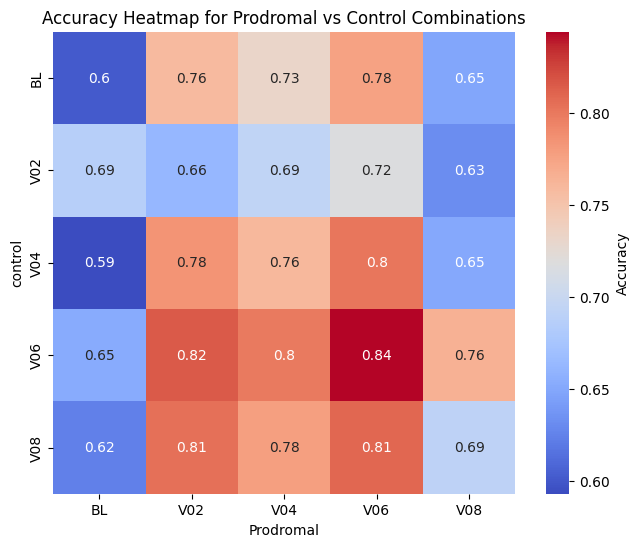

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
acc = []
for i,j in tqdm(ACCURACY_DICT.items()):
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_control = pd.DataFrame([pro,Control,acc]).T
accuracy_table_pro_control  = accuracy_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Accuracy'})

accuracy_table_pro_control['Accuracy'] = accuracy_table_pro_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_control.pivot(index="control", columns="Prodromal", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs Control Combinations")

plt.savefig("../heatmaps_plots/accuracy_heatmaps/PD_pro_vs_con_accuracy_heatmap.svg", format='svg')


plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 438734.73it/s]


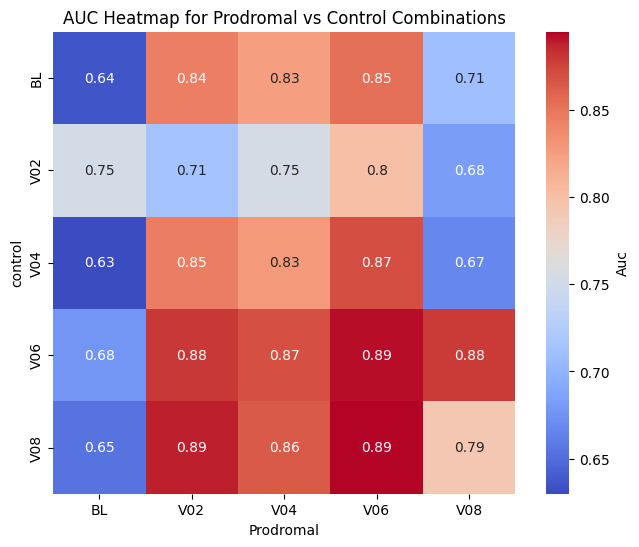

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
auc = []

for i,j in tqdm(AUC_SCORES.items()):
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    auc.append(j)


auc_table_pro_control = pd.DataFrame([pro,Control,auc]).T
auc_table_pro_control  = auc_table_pro_control.rename(columns = {0:'Prodromal', 1:'control', 2: 'Auc'})

auc_table_pro_control['Auc'] = auc_table_pro_control['Auc'].astype(float)
heatmap_data_ = auc_table_pro_control.pivot(index="control", columns="Prodromal", values="Auc")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Auc'})
plt.title("AUC Heatmap for Prodromal vs Control Combinations")

plt.savefig("../heatmaps_plots/auc_heatmaps/pd_pro_vs_con_auc_heatmap.svg", format='svg')

plt.show()

In [65]:
df_acc = pd.DataFrame(list(ACCURACY_DICT.items()), columns=['Comparison', 'Accuracy'])
df_auc = pd.DataFrame(list(AUC_SCORES.items()), columns=['Comparison', 'AUC'])
#df_f1  = pd.DataFrame(list(F1_SCORES.items()), columns=['Comparison', 'F1'])
df_precision = pd.DataFrame(list(PRECISION_SCORES.items()), columns=['Comparison', 'Precision'])
df_recall = pd.DataFrame(list(RECALL_SCORES.items()), columns=['Comparison', 'Recall'])

import pandas as pd
from functools import reduce

# List of DataFrames to merge
dfs = [df_acc, df_auc, df_precision, df_recall]

# Merge all DataFrames on 'Comparison'
df_all = reduce(lambda left, right: pd.merge(left, right, on='Comparison'), dfs)

df_all.to_csv('../metrics_csv_files/metrics_PD_pro_vs_con.csv',index = False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 117159.33it/s]


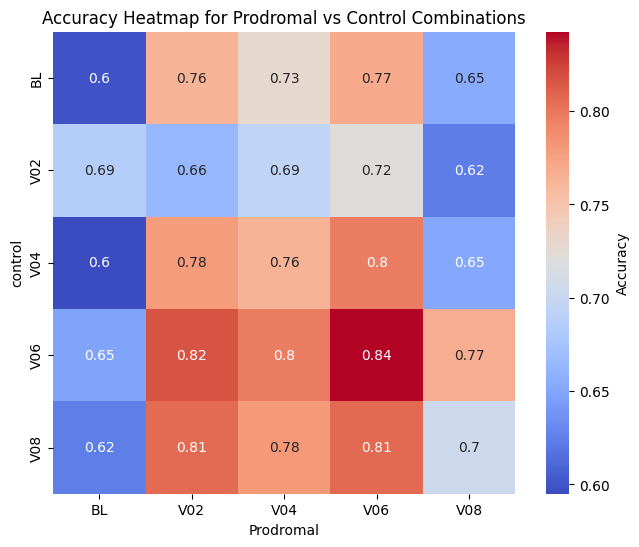

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
acc = []
for i,j in tqdm(ACCURACY_DICT.items()):
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_control = pd.DataFrame([pro,Control,acc]).T
accuracy_table_pro_control  = accuracy_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Accuracy'})

accuracy_table_pro_control['Accuracy'] = accuracy_table_pro_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_control.pivot(index="control", columns="Prodromal", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs Control Combinations")
plt.show()

In [101]:
#FEATURE_IMPORTANCES['Prodromal_V08_Control_V08']
#sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08'].items(), key=lambda item: item[1]))

In [102]:
#sorted_0_dict_FEATURE_IMPORTANCES_asc

In [103]:
sorted_2_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_1'].items(), key=lambda item: item[1]))
sorted_2_dict_FEATURE_IMPORTANCES_asc

{'ENSG00000204120': -0.7661113105124413,
 'ENSG00000114867': -0.3610894435782404,
 'ENSG00000177628': -0.3488611846792989,
 'ENSG00000089063': -0.27382037435660384,
 'ENSG00000197324': -0.24154442014284838,
 'ENSG00000188906': -0.09614240475521305,
 'ENSG00000100225': -0.08110409805482839,
 'ENSG00000158828': -0.051129169627386936,
 'ENSG00000185345': -0.05097754109408056,
 'ENSG00000145335': -0.002247820100521541,
 'ENSG00000154277': 0.1031751580086207,
 'ENSG00000069329': 0.12871420581147813,
 'ENSG00000116675': 0.15919288023796474,
 'ENSG00000115317': 0.16137917761757842,
 'ENSG00000162402': 0.23162165093959922,
 'ENSG00000166405': 0.25574320977762566,
 'ENSG00000159363': 0.2867831323607159,
 'ENSG00000116288': 0.29943954941447726,
 'ENSG00000129003': 0.3263749597563841,
 'ENSG00000106153': 0.4535050618625793,
 'ENSG00000159082': 0.47330850066927826,
 'ENSG00000184381': 0.5792804506547093}

In [104]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
3.PD           1716
1.Control       869
2.Prodromal     254
Name: count, dtype: int64

In [105]:
data['DIAGNOSIS_2'] = data['DIAGNOSIS']

In [106]:
data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)

/tmp/ipykernel_173849/960865595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)


In [107]:
data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']

In [108]:
data = data.sort_values(by = 'New_Time_Point')

In [109]:
tmp_data = data[data.Time_Point !='V02']

In [110]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000145335  ENSG00000114867  \
2979  1.Control         4067         BL         654.2980         11.86950   
497   1.Control         3114         BL        1074.6600         14.13300   
782   1.Control         3222         BL         696.2340          6.07570   
777   1.Control         3221         BL        1001.9000         11.98860   
596   1.Control         3161         BL        1129.3800          7.68614   
...         ...          ...        ...              ...              ...   
1420       3.PD         3459        V08         368.8420          7.79005   
2118       3.PD         3773        V08          93.1056          7.26974   
2330       3.PD         3830        V08         943.9850         14.06180   
2312       3.PD         3826        V08         958.3530         19.28580   
1622       3.PD         3530        V08        1017.5600          6.59332   

      ENSG00000162402  ENSG00000177628  ENSG00000100225  ENSG00000129003  \
2979          30.6083          3.14293         275.0410          62.4584   
497           24.7374          2.09580         246.6310          44.4942   
782           18.5583          2.19248         126.0260          43.4593   
777           24.8813          3.01636         347.2130          45.1880   
596           15.9255          2.08999         331.8750          33.2601   
...               ...              ...              ...              ...   
1420          20.1860          3.20369         118.8700          49.2086   
2118          22.9040          3.01769          29.2421          40.9876   
2330          40.3895          4.80400         317.0540          57.6128   
2312          57.6993          7.12019         316.7150          91.0064   
1622          25.3498          2.68569         236.0270          44.1492   

      ENSG00000159082  ...  ENSG00000158828  ENSG00000166405  ENSG00000089063  \
2979          22.3513  ...         46.02040          8.51330          24.1253   
497           12.4612  ...         28.69410          9.07368          14.0260   
782           14.2248  ...         12.96840          3.68967          14.3514   
777           12.3129  ...         22.91430          7.85283          22.6016   
596           12.7569  ...         30.91830          5.94737          13.3539   
...               ...  ...              ...              ...              ...   
1420          16.7826  ...         17.72100          5.98638          21.1953   
2118          13.5412  ...          5.36094          8.13120          11.8076   
2330          19.2039  ...         20.27120          7.64632          26.1490   
2312          23.0596  ...         20.64390         12.58020          34.6906   
1622          17.6533  ...         20.67240          5.43142          17.7342   

      ENSG00000115317  ENSG00000106153  ENSG00000159363  ENSG00000154277  \
2979          7.38434          62.7528         1.914580         0.053797   
497           6.49794          33.4316         1.370130         0.093039   
782           4.72904          47.2469         0.605465         0.000000   
777           5.91518          52.2061         1.555070         0.029913   
596           4.54810          32.1114         0.793565         0.000000   
...               ...              ...              ...              ...   
1420          5.96704          56.1483         1.467990         0.044032   
2118          4.35331          49.9042         0.882733         0.353649   
2330          8.72873          50.0480         2.404920         0.000000   
2312         11.92460          65.7031         3.254740         0.053198   
1622          5.85501          72.6860         1.049460         0.044862   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979    1.Control    1.Control_BL      1.Control_BL  
497     1.Control    1.Control_BL      1.Control_BL  
782     1.Control    1.Control_BL      1.Control_BL  
777     1.Control    1.Control_BL      1.Control_BL  
596     1.Co

In [111]:
df = pd.DataFrame(sorted_2_dict_FEATURE_IMPORTANCES_asc.items())
df[2] = np.abs(df[1])
df = df.sort_values(by = 2, ascending=False)
df

0         1         2
0   ENSG00000204120 -0.766111  0.766111
21  ENSG00000184381  0.579280  0.579280
20  ENSG00000159082  0.473309  0.473309
19  ENSG00000106153  0.453505  0.453505
1   ENSG00000114867 -0.361089  0.361089
2   ENSG00000177628 -0.348861  0.348861
18  ENSG00000129003  0.326375  0.326375
17  ENSG00000116288  0.299440  0.299440
16  ENSG00000159363  0.286783  0.286783
3   ENSG00000089063 -0.273820  0.273820
15  ENSG00000166405  0.255743  0.255743
4   ENSG00000197324 -0.241544  0.241544
14  ENSG00000162402  0.231622  0.231622
13  ENSG00000115317  0.161379  0.161379
12  ENSG00000116675  0.159193  0.159193
11  ENSG00000069329  0.128714  0.128714
10  ENSG00000154277  0.103175  0.103175
5   ENSG00000188906 -0.096142  0.096142
6   ENSG00000100225 -0.081104  0.081104
7   ENSG00000158828 -0.051129  0.051129
8   ENSG00000185345 -0.050978  0.050978
9   ENSG00000145335 -0.002248  0.002248

In [112]:
tmp_data

DIAGNOSIS Patient_Name Time_Point  ENSG00000145335  ENSG00000114867  \
2979  1.Control         4067         BL         654.2980         11.86950   
497   1.Control         3114         BL        1074.6600         14.13300   
782   1.Control         3222         BL         696.2340          6.07570   
777   1.Control         3221         BL        1001.9000         11.98860   
596   1.Control         3161         BL        1129.3800          7.68614   
...         ...          ...        ...              ...              ...   
1420       3.PD         3459        V08         368.8420          7.79005   
2118       3.PD         3773        V08          93.1056          7.26974   
2330       3.PD         3830        V08         943.9850         14.06180   
2312       3.PD         3826        V08         958.3530         19.28580   
1622       3.PD         3530        V08        1017.5600          6.59332   

      ENSG00000162402  ENSG00000177628  ENSG00000100225  ENSG00000129003  \
2979          30.6083          3.14293         275.0410          62.4584   
497           24.7374          2.09580         246.6310          44.4942   
782           18.5583          2.19248         126.0260          43.4593   
777           24.8813          3.01636         347.2130          45.1880   
596           15.9255          2.08999         331.8750          33.2601   
...               ...              ...              ...              ...   
1420          20.1860          3.20369         118.8700          49.2086   
2118          22.9040          3.01769          29.2421          40.9876   
2330          40.3895          4.80400         317.0540          57.6128   
2312          57.6993          7.12019         316.7150          91.0064   
1622          25.3498          2.68569         236.0270          44.1492   

      ENSG00000159082  ...  ENSG00000158828  ENSG00000166405  ENSG00000089063  \
2979          22.3513  ...         46.02040          8.51330          24.1253   
497           12.4612  ...         28.69410          9.07368          14.0260   
782           14.2248  ...         12.96840          3.68967          14.3514   
777           12.3129  ...         22.91430          7.85283          22.6016   
596           12.7569  ...         30.91830          5.94737          13.3539   
...               ...  ...              ...              ...              ...   
1420          16.7826  ...         17.72100          5.98638          21.1953   
2118          13.5412  ...          5.36094          8.13120          11.8076   
2330          19.2039  ...         20.27120          7.64632          26.1490   
2312          23.0596  ...         20.64390         12.58020          34.6906   
1622          17.6533  ...         20.67240          5.43142          17.7342   

      ENSG00000115317  ENSG00000106153  ENSG00000159363  ENSG00000154277  \
2979          7.38434          62.7528         1.914580         0.053797   
497           6.49794          33.4316         1.370130         0.093039   
782           4.72904          47.2469         0.605465         0.000000   
777           5.91518          52.2061         1.555070         0.029913   
596           4.54810          32.1114         0.793565         0.000000   
...               ...              ...              ...              ...   
1420          5.96704          56.1483         1.467990         0.044032   
2118          4.35331          49.9042         0.882733         0.353649   
2330          8.72873          50.0480         2.404920         0.000000   
2312         11.92460          65.7031         3.254740         0.053198   
1622          5.85501          72.6860         1.049460         0.044862   

      DIAGNOSIS_2  New_Time_Point  New_Time_Point_2  
2979    1.Control    1.Control_BL      1.Control_BL  
497     1.Control    1.Control_BL      1.Control_BL  
782     1.Control    1.Control_BL      1.Control_BL  
777     1.Control    1.Control_BL      1.Control_BL  
596     1.Co

In [113]:
tmp_data.New_Time_Point_2.unique()

array(['1.Control_BL', '1.Control_V04', '1.Control_V06', '1.Control_V08',
       '2.Prodromal_BL', '2.Prodromal_V04', '2.Prodromal_V06',
       '2.Prodromal_V08', '3.PD_BL', '3.PD_V04', '3.PD_V06', '3.PD_V08'],
      dtype=object)

In [114]:
genes = df[0].values.tolist()

In [115]:
control_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith('Control')]
control_tmp_data = control_tmp_data.sort_values(by = 'New_Time_Point') 
control_tmp_data

Empty DataFrame
Columns: [DIAGNOSIS, Patient_Name, Time_Point, ENSG00000145335, ENSG00000114867, ENSG00000162402, ENSG00000177628, ENSG00000100225, ENSG00000129003, ENSG00000159082, ENSG00000116288, ENSG00000188906, ENSG00000184381, ENSG00000069329, ENSG00000204120, ENSG00000185345, ENSG00000116675, ENSG00000197324, ENSG00000158828, ENSG00000166405, ENSG00000089063, ENSG00000115317, ENSG00000106153, ENSG00000159363, ENSG00000154277, DIAGNOSIS_2, New_Time_Point, New_Time_Point_2]
Index: []

[0 rows x 28 columns]

In [116]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        print(ensembleid)
        return ensembleid


### 6. Expression of Genes with time 

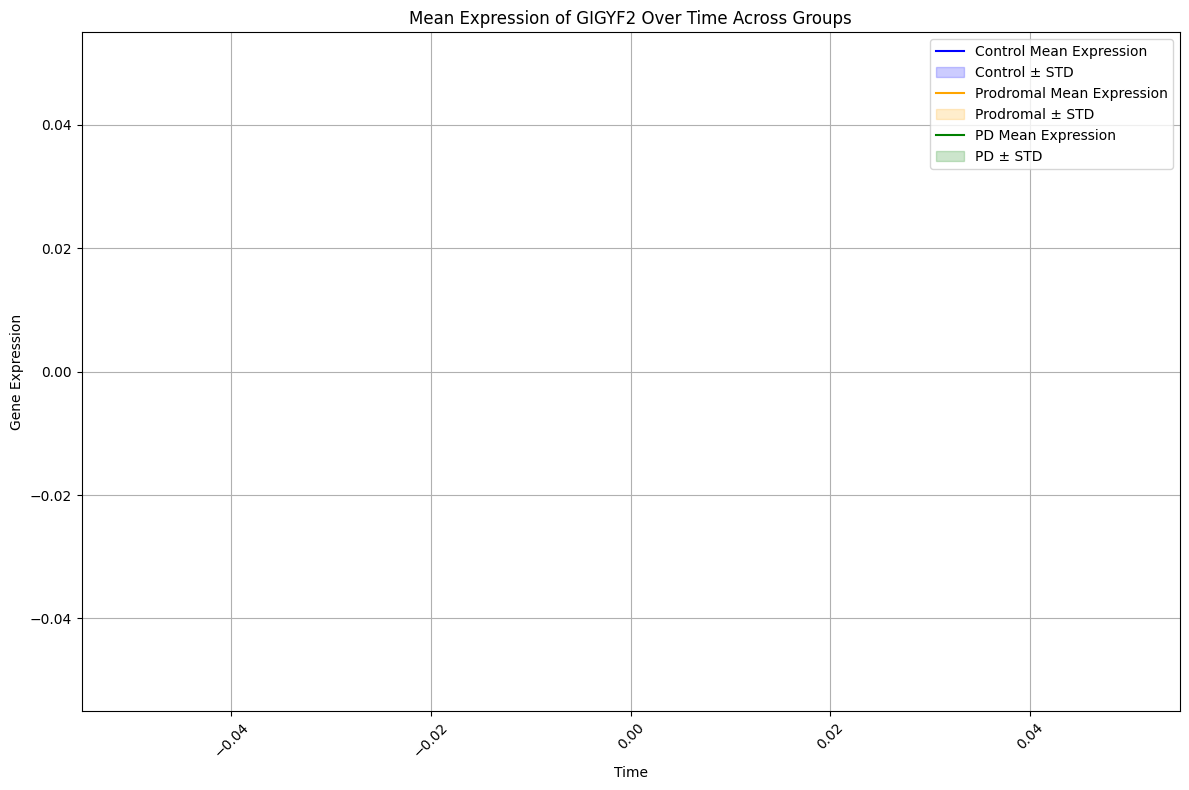

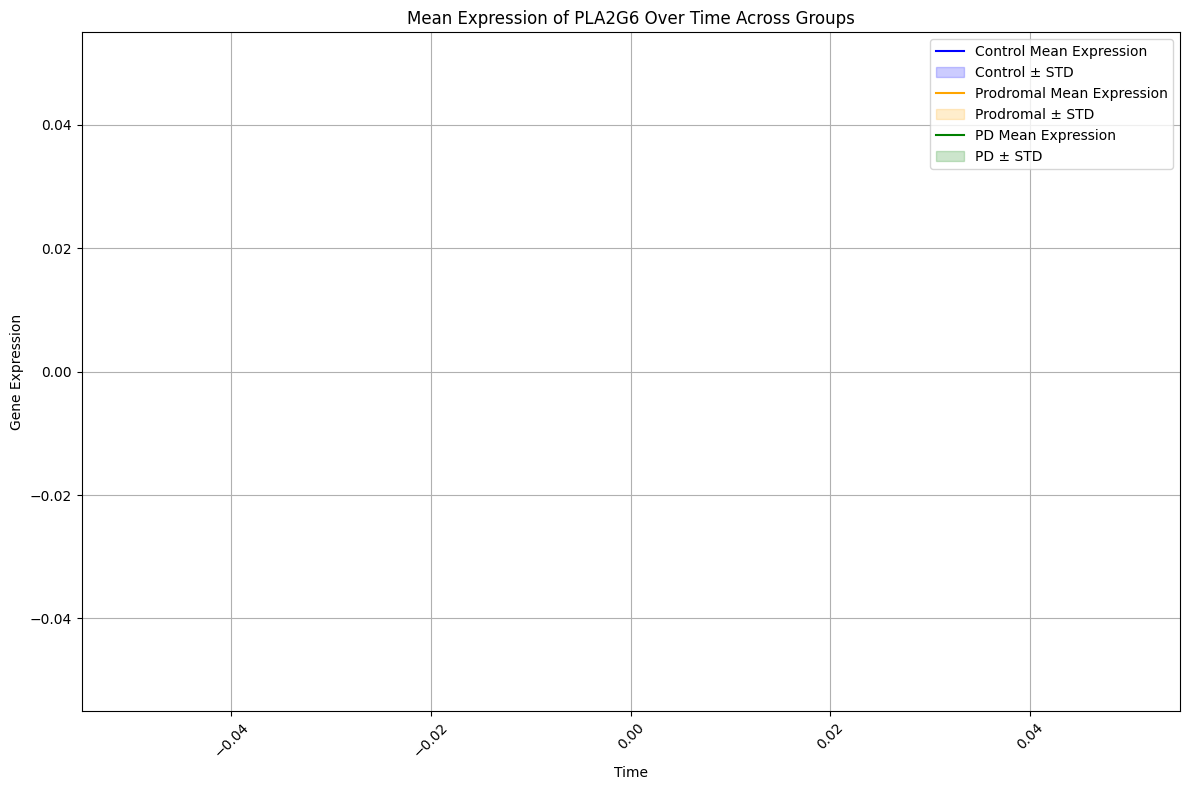

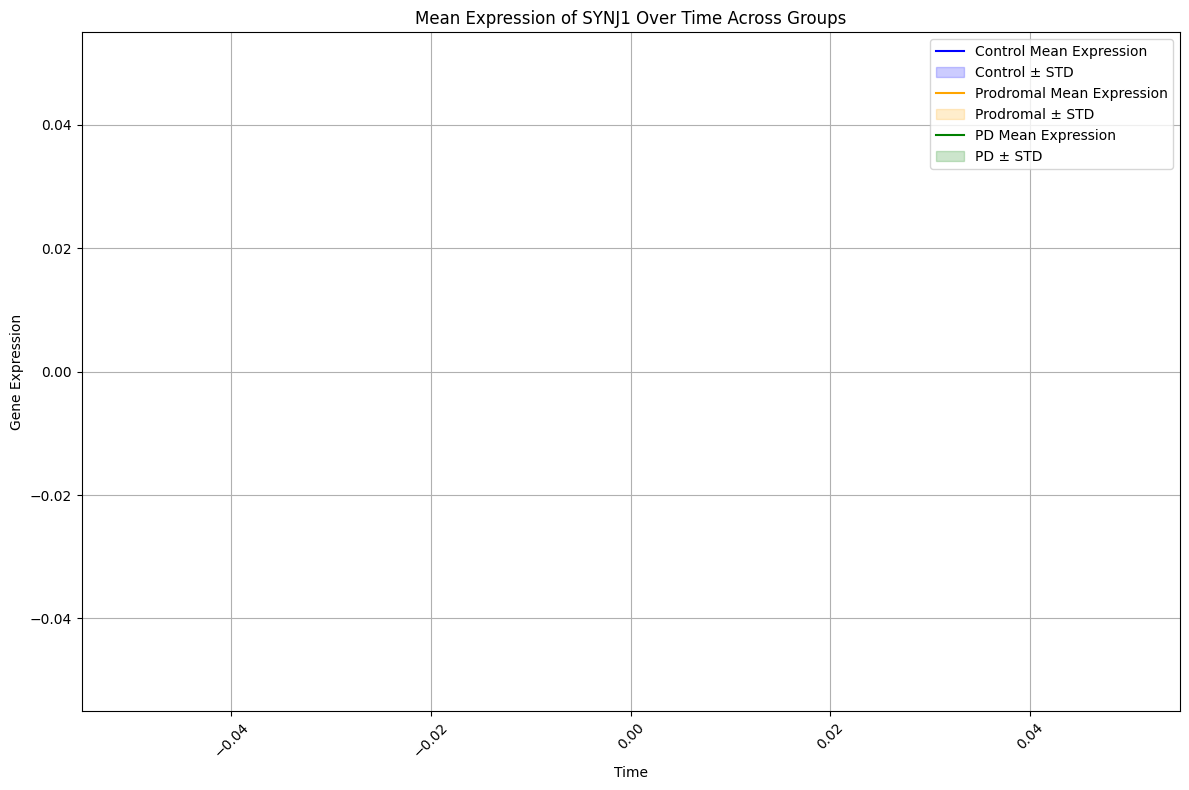

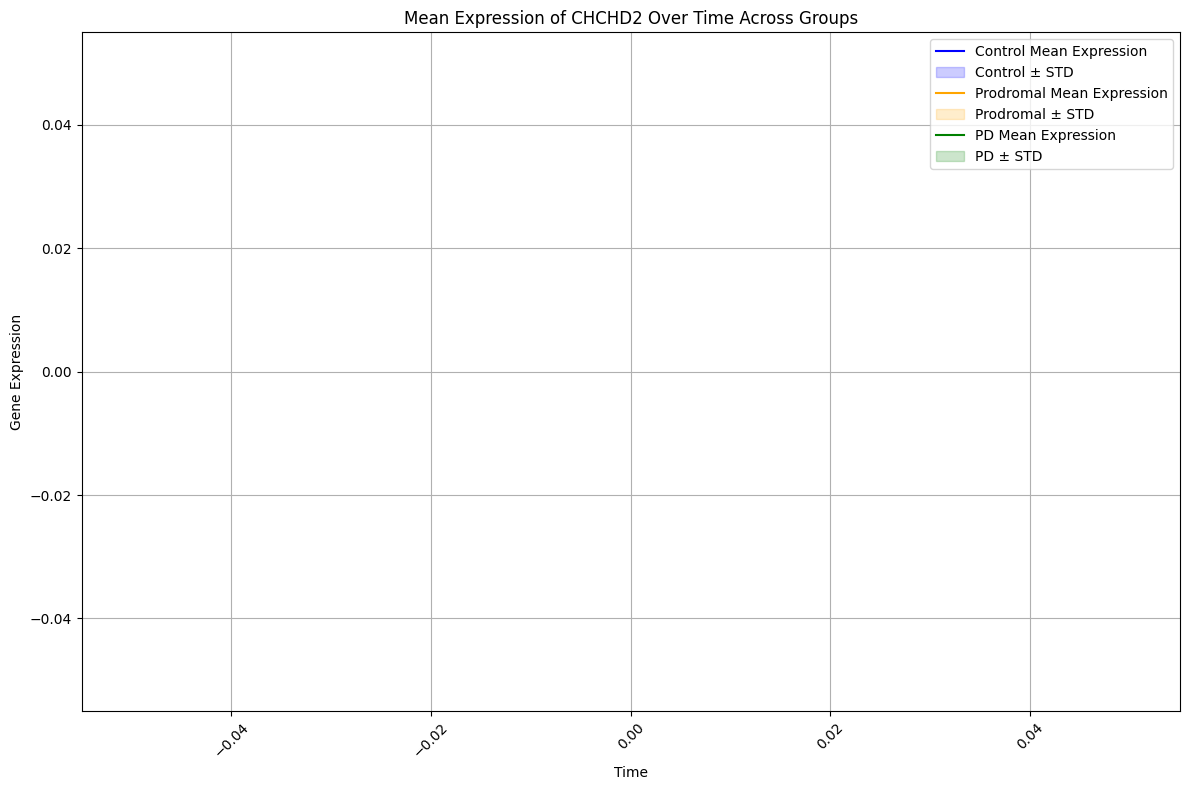

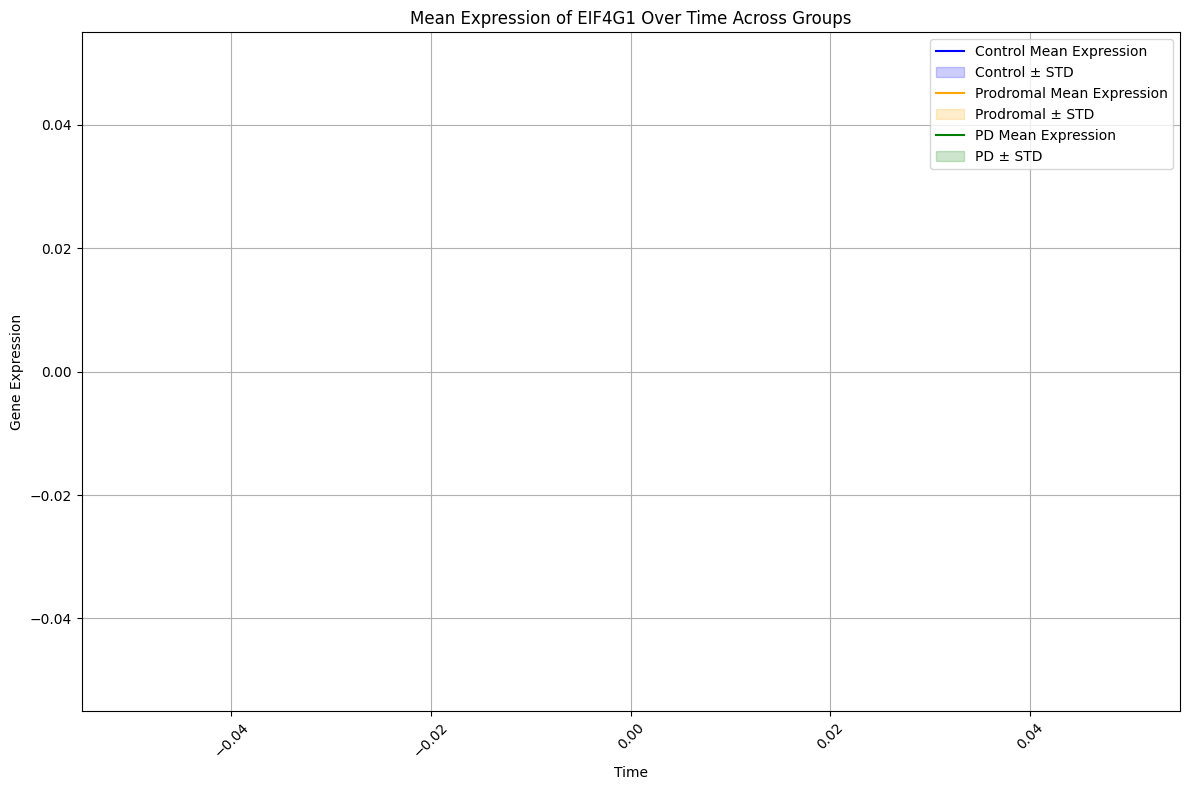

ENSG00000177628


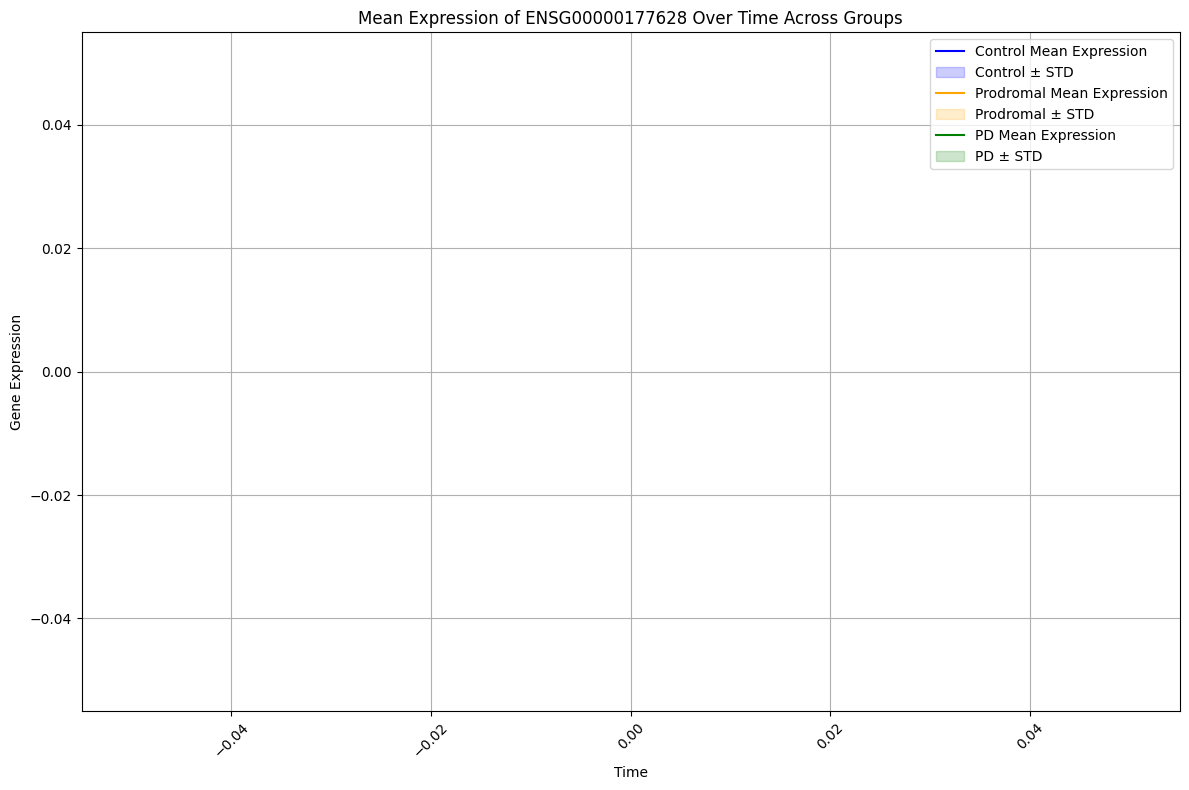

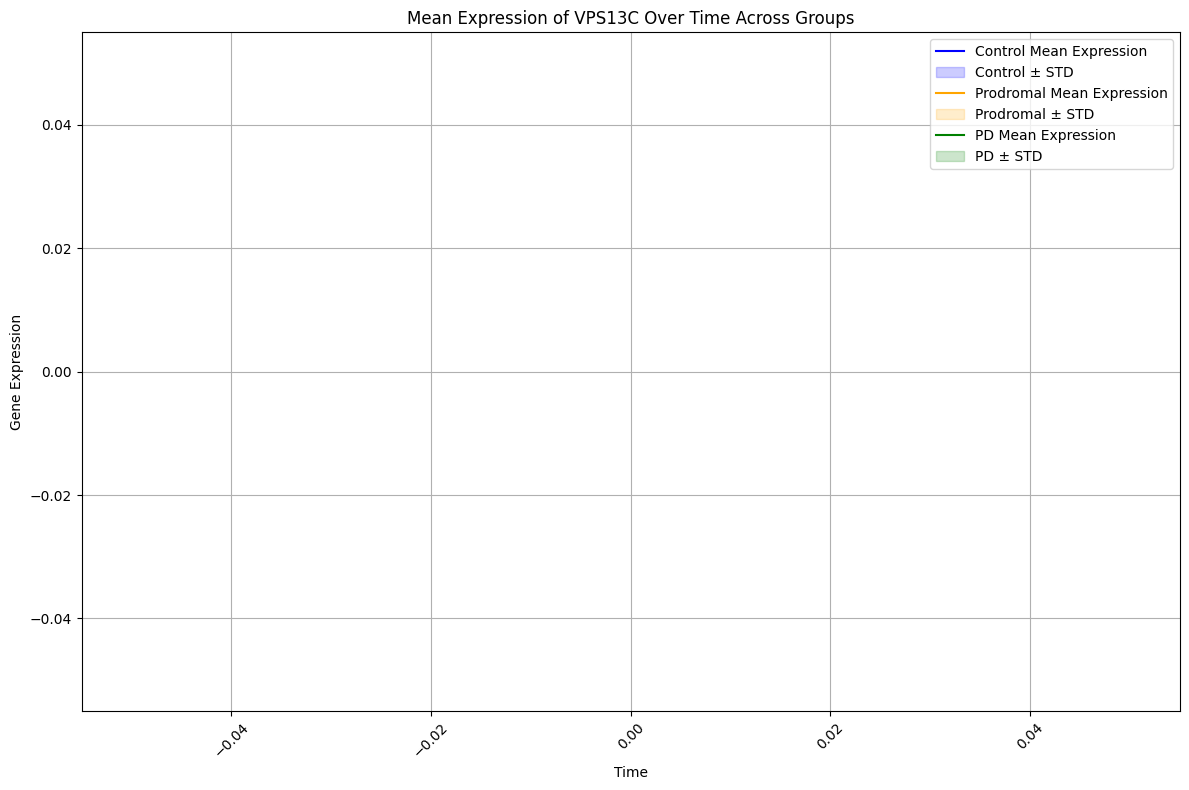

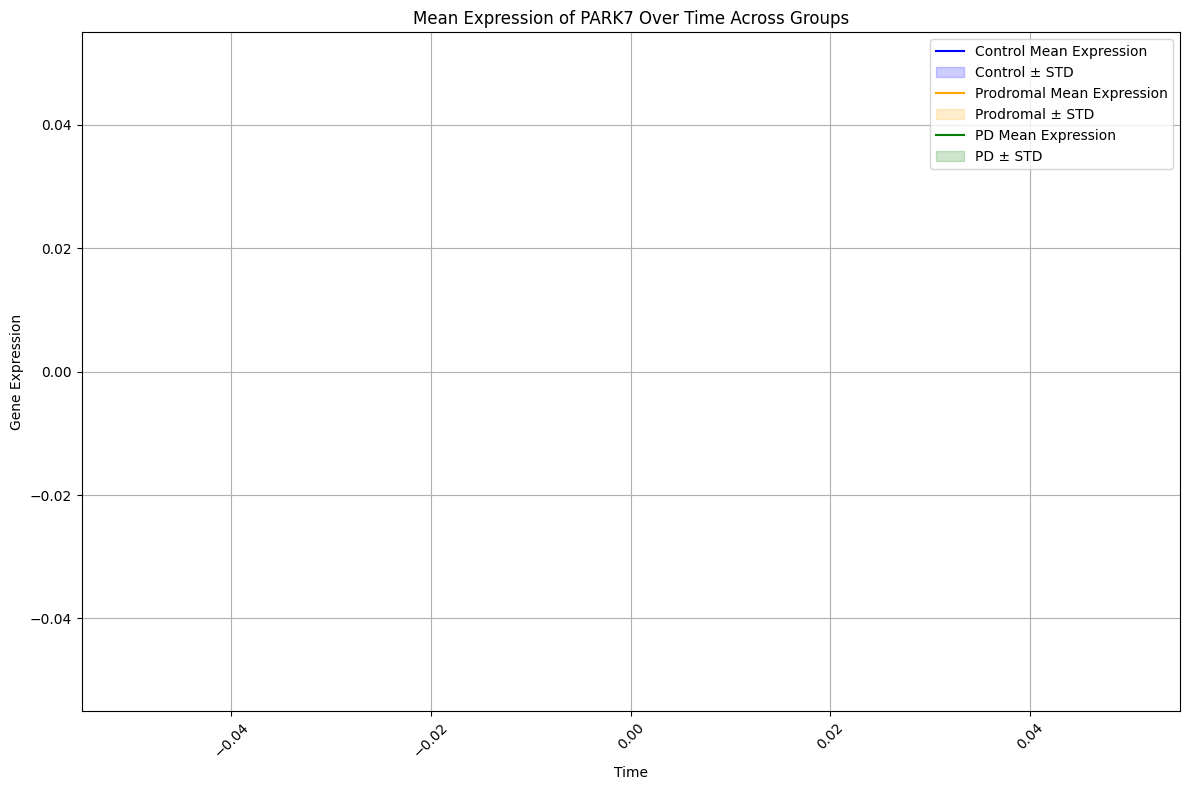

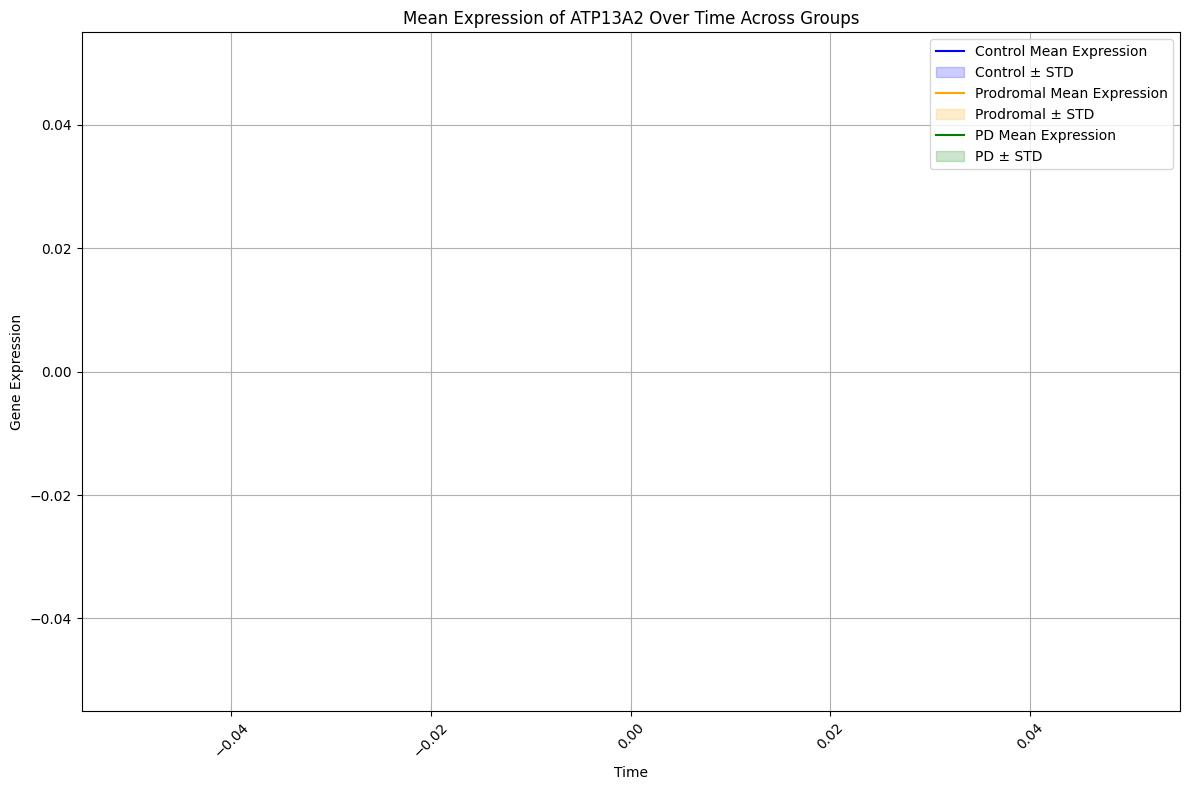

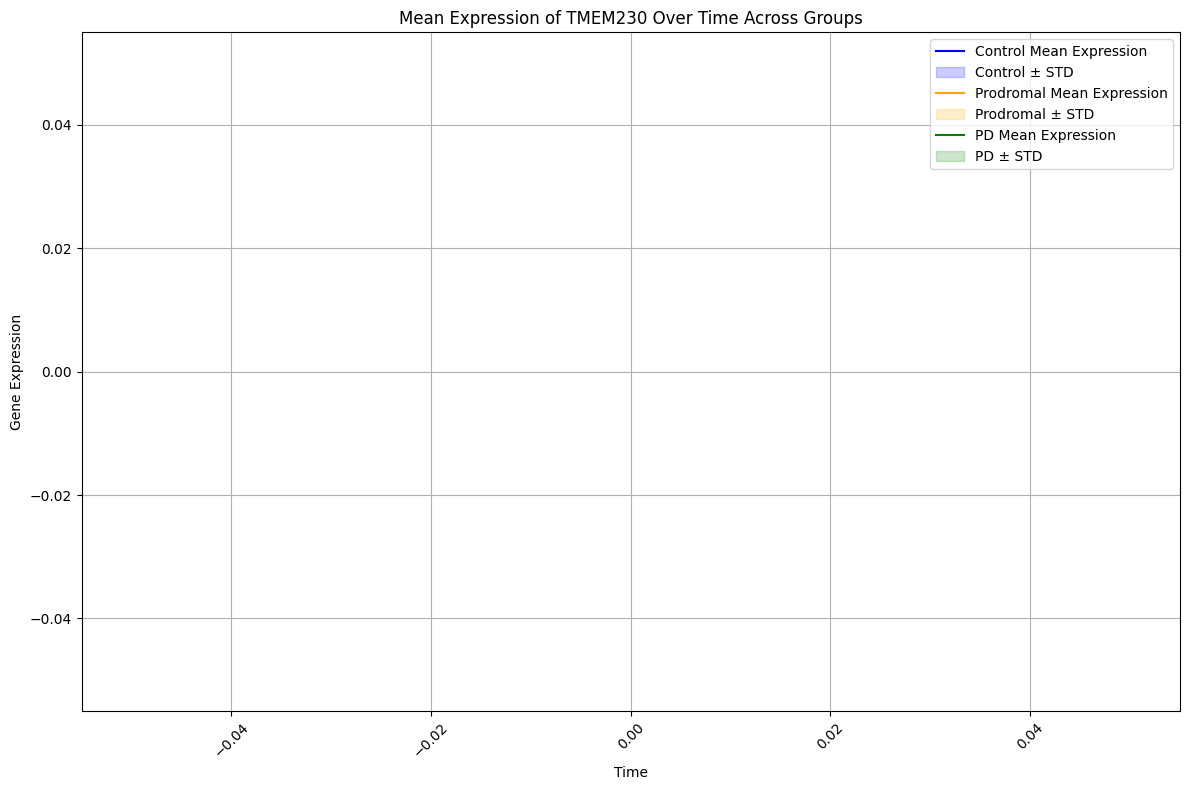

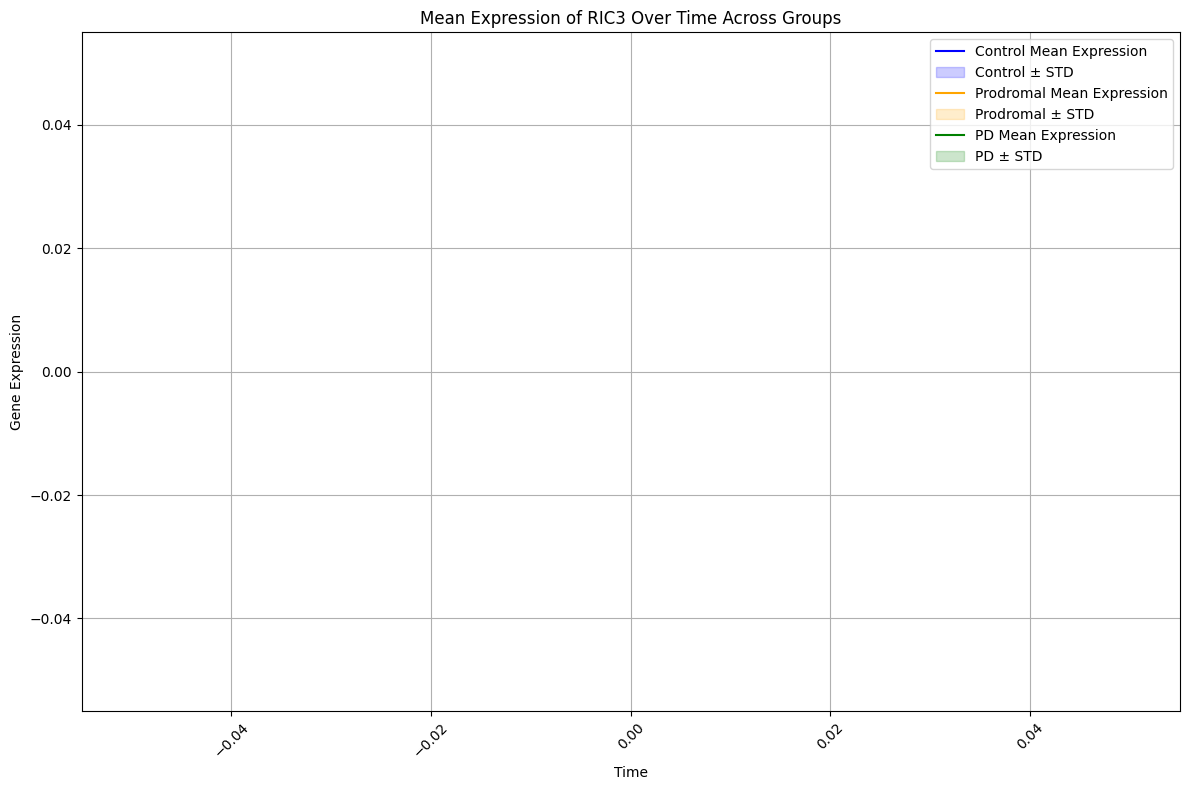

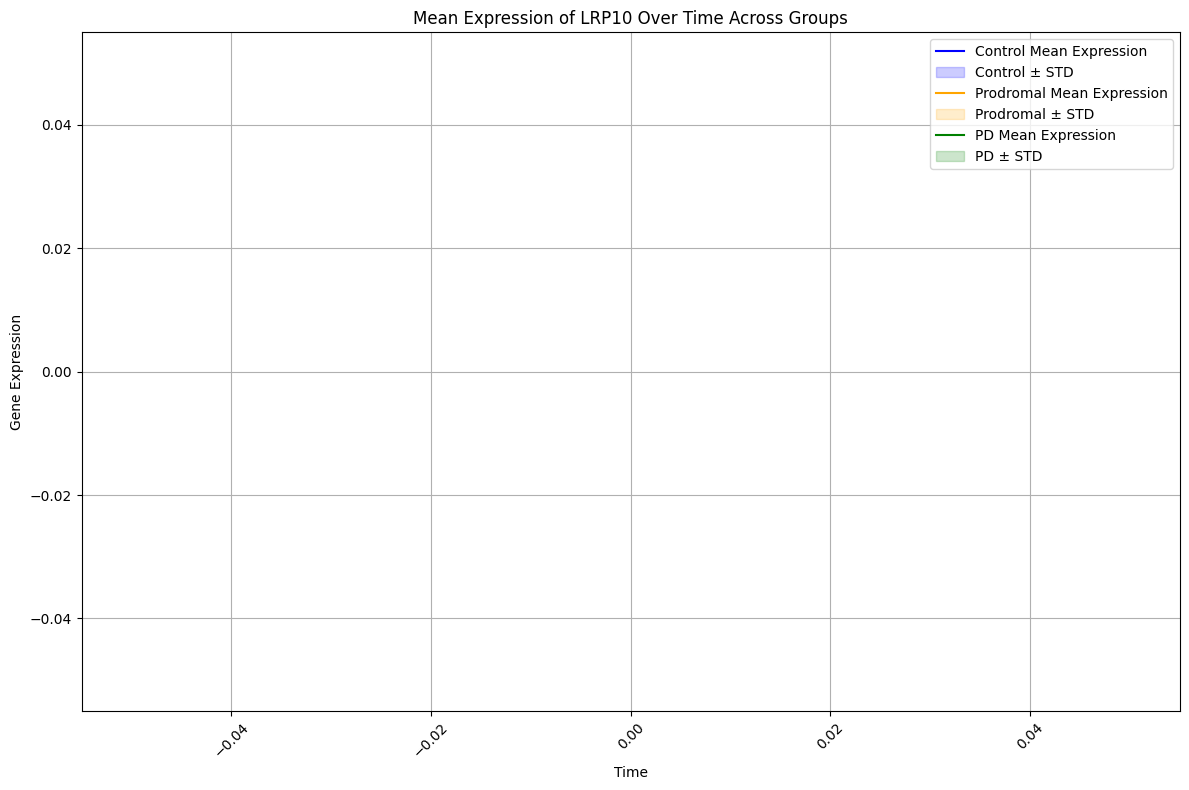

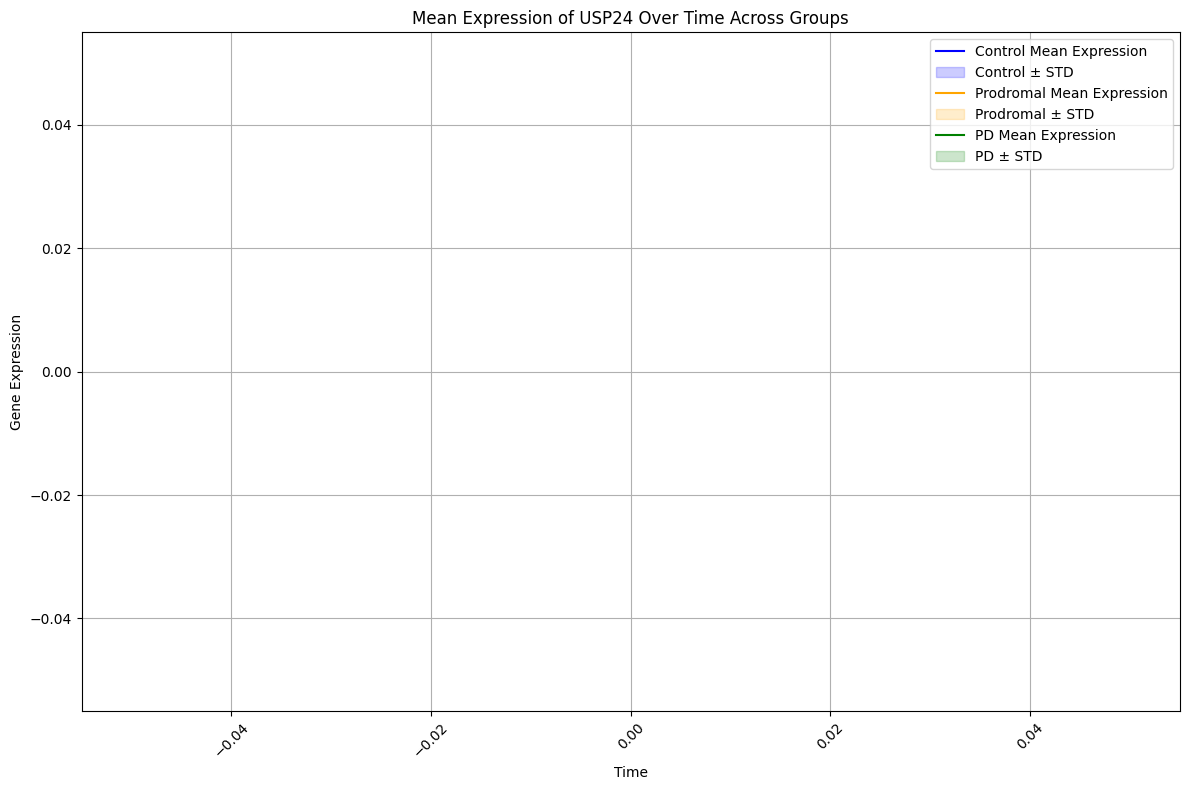

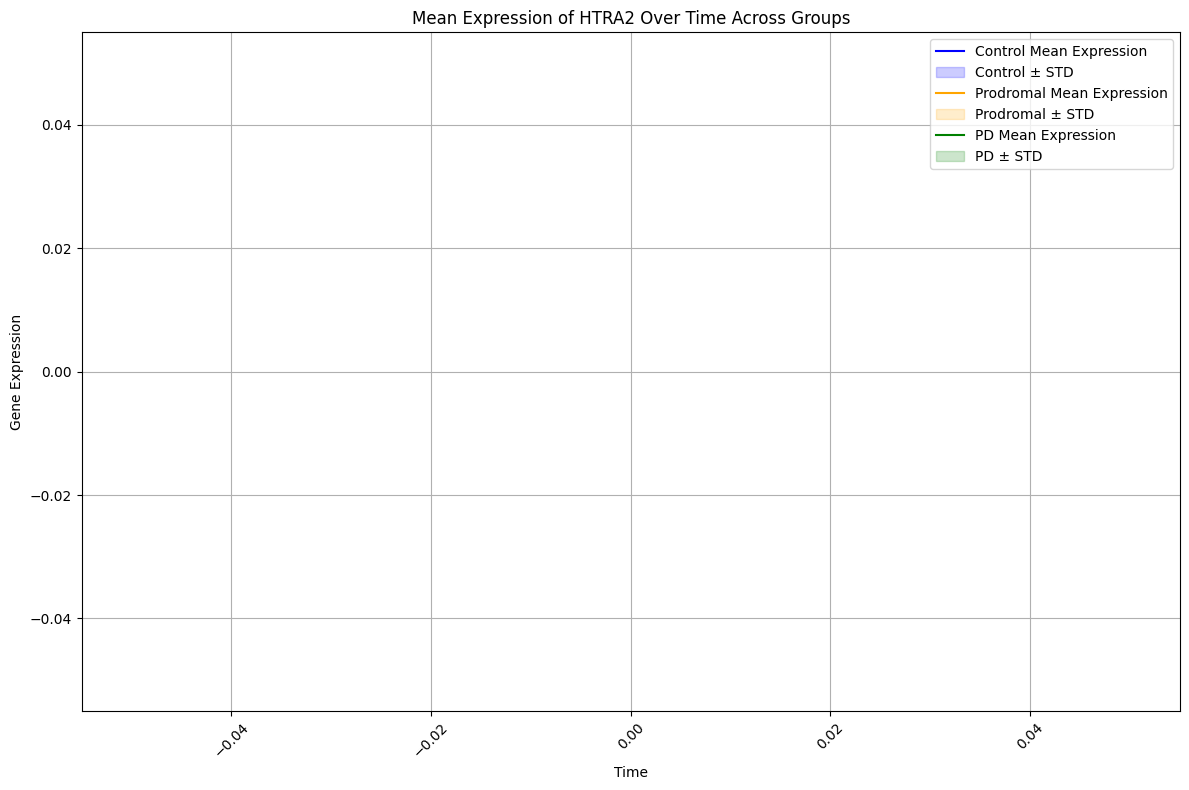

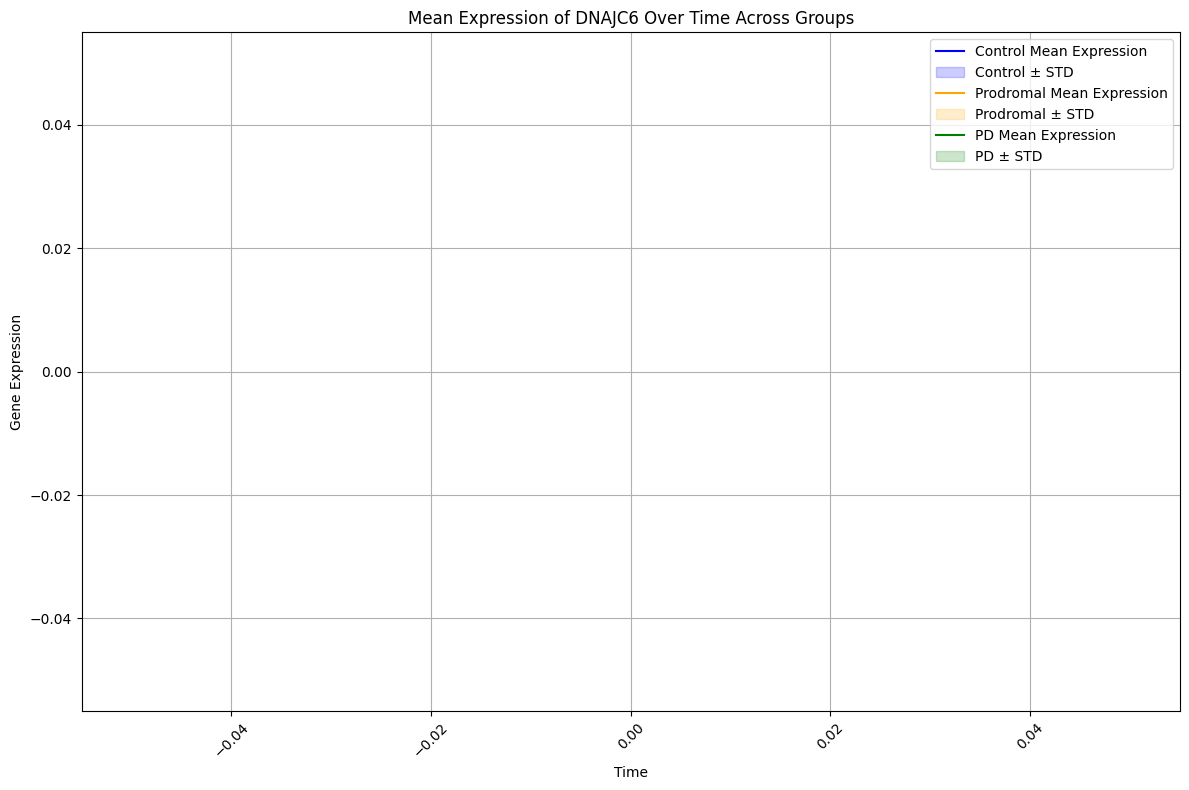

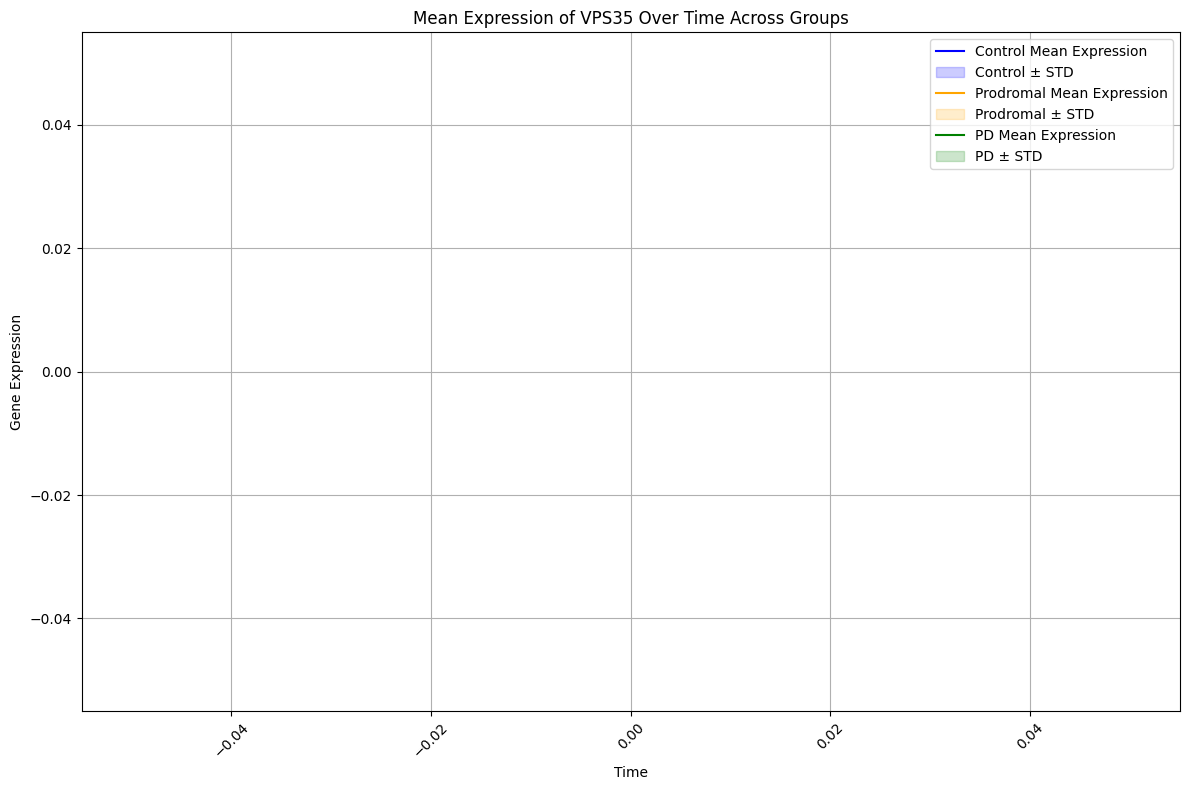

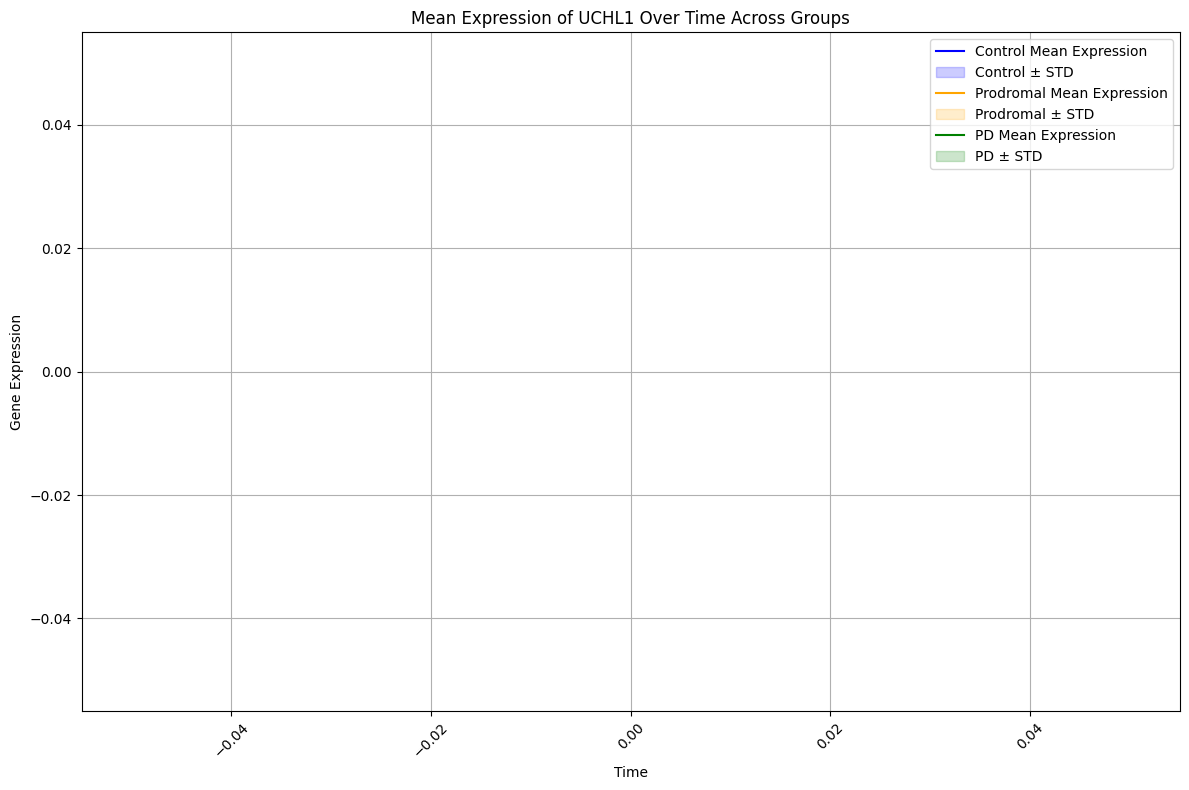

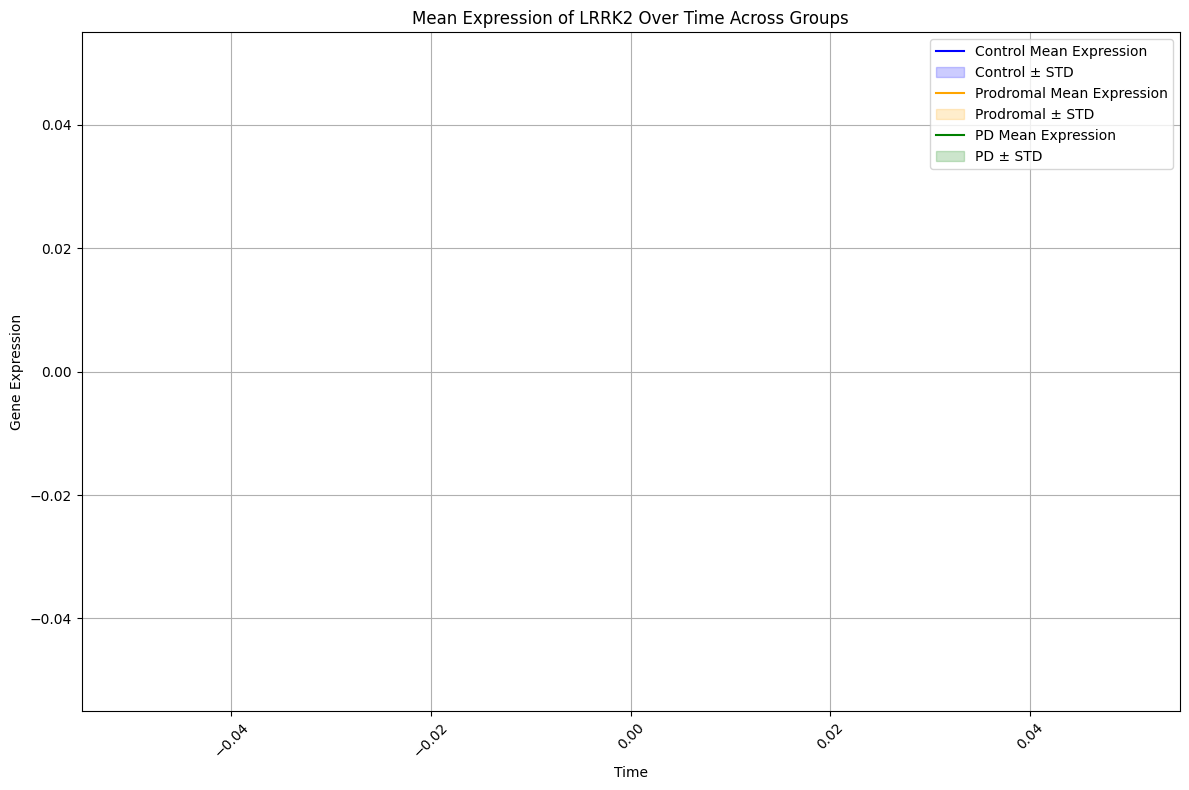

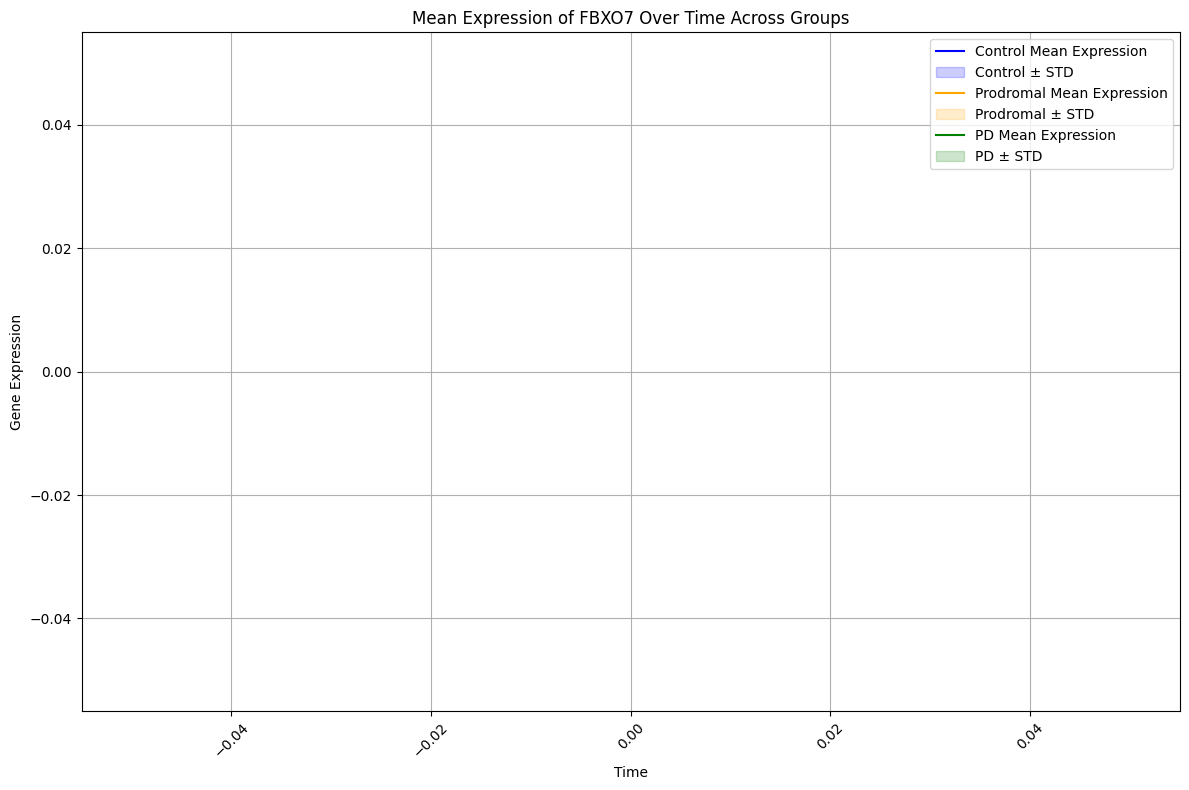

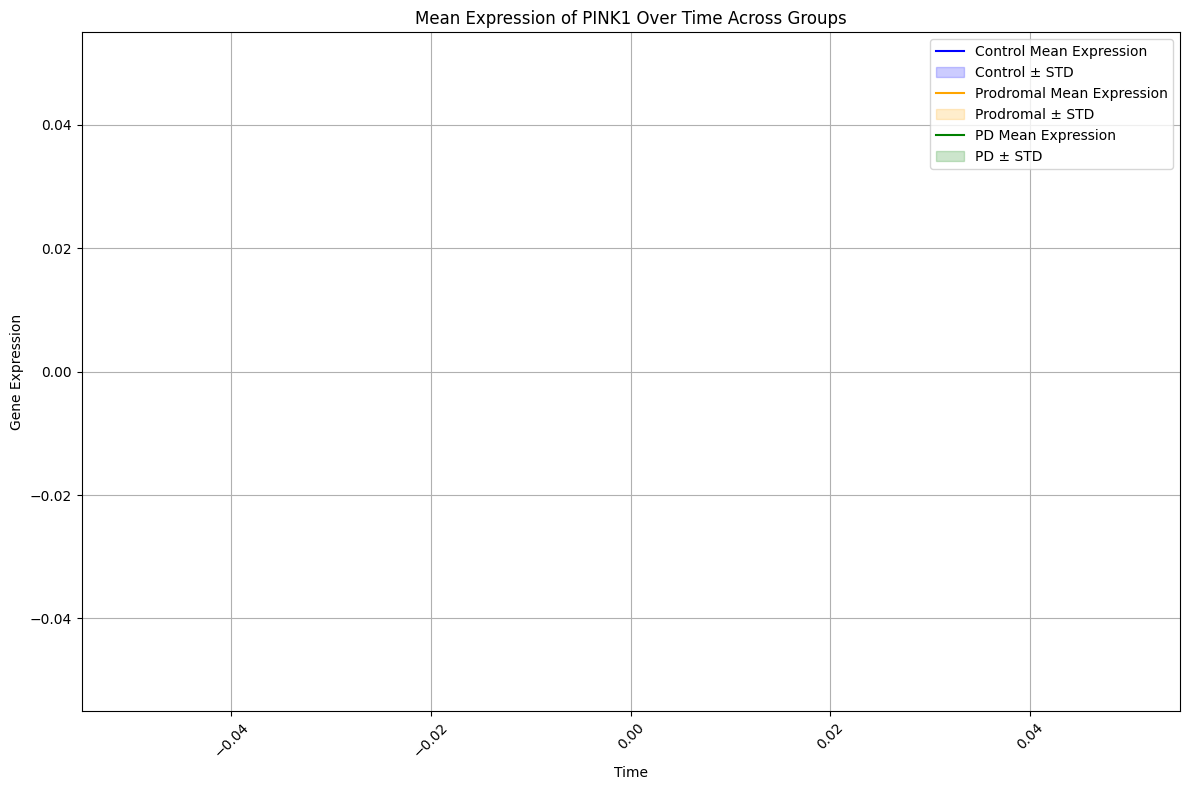

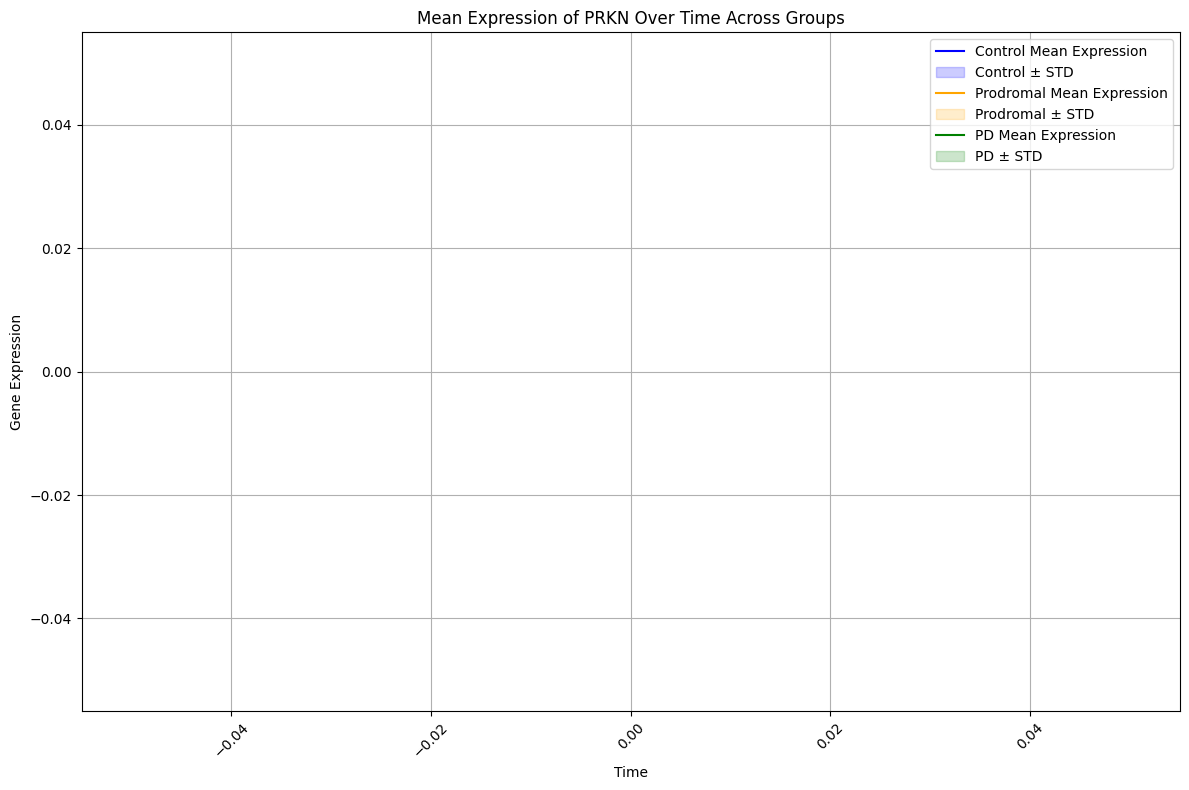

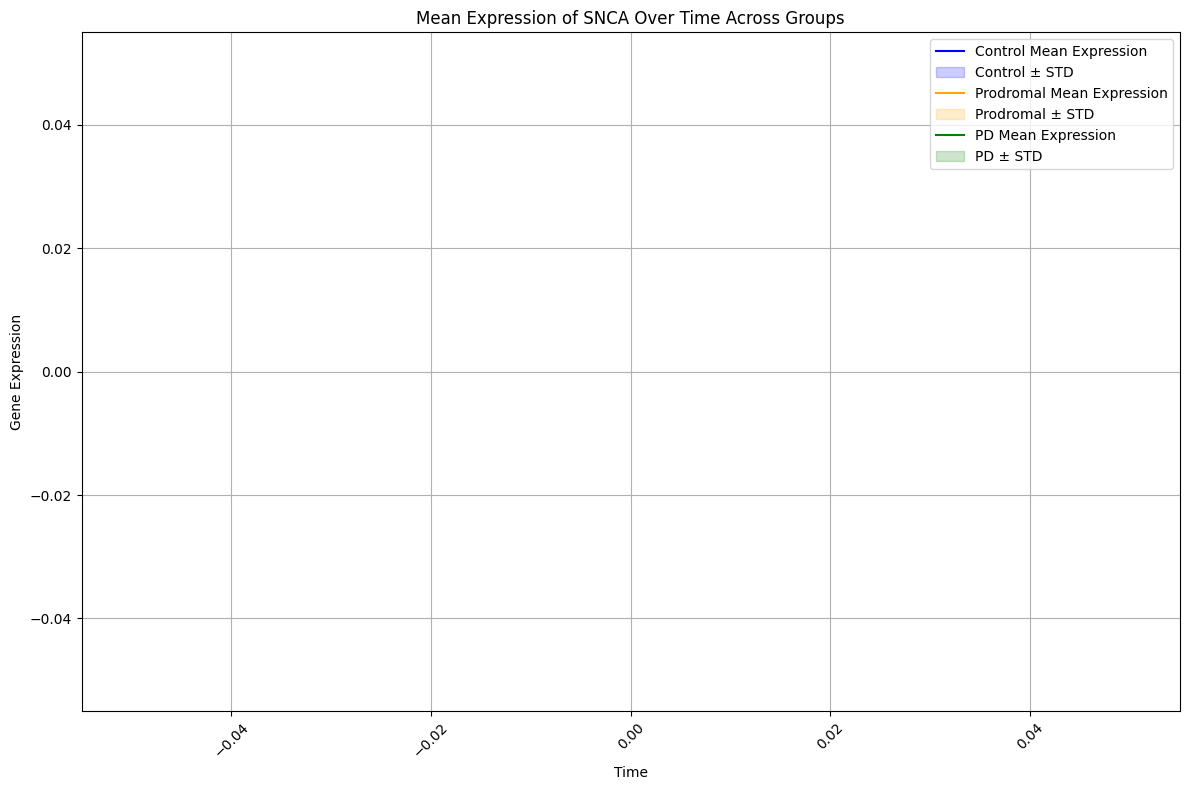

In [117]:
import matplotlib.pyplot as plt

# Loop through each gene
for gene in genes:
    # Create a new figure for each gene
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the group data
    groups = ['Control', 'Prodromal', 'PD']
    colors = {'Control': 'blue', 'Prodromal': 'orange', 'PD': 'green'}
    
    for group in groups:
        # Filter and sort data by group
        group_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith(group)]
        group_tmp_data = group_tmp_data.sort_values(by='New_Time_Point')
        
        # Calculate mean and standard deviation
        mean_expression = group_tmp_data.groupby('New_Time_Point')[gene].mean()
        std_expression = group_tmp_data.groupby('New_Time_Point')[gene].std()
        
        # Extract clean time points
        index = [i.split('_')[1] for i in mean_expression.index]
        
        # Plot mean expression
        plt.plot(index, mean_expression, color=colors[group], label=f'{group} Mean Expression')
        
        # Fill the standard deviation area
        plt.fill_between(index,
                         mean_expression - std_expression,
                         mean_expression + std_expression,
                         color=colors[group], alpha=0.2, label=f'{group} ± STD')
    
    # Customize plot
    plt.xlabel('Time')
    plt.ylabel('Gene Expression')
    gene  = return_gene_name(gene)
    plt.title(f'Mean Expression of {gene} Over Time Across Groups')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()



In [118]:
FEATURE_IMPORTANCES.keys()

dict_keys(['Prodromal_V08_Control_V08_0', 'Prodromal_V08_Control_V08_1', 'Prodromal_V08_Control_V08_2', 'Prodromal_V08_Control_V08_3', 'Prodromal_V08_Control_V08_4', 'Prodromal_V08_Control_V08_5', 'Prodromal_V08_Control_V08_6', 'Prodromal_V08_Control_V08_7', 'Prodromal_V08_Control_V08_8', 'Prodromal_V08_Control_V08_9', 'Prodromal_V08_Control_V08_10', 'Prodromal_V08_Control_V08_11', 'Prodromal_V08_Control_V08_12', 'Prodromal_V08_Control_V08_13', 'Prodromal_V08_Control_V08_14', 'Prodromal_V08_Control_V08_15', 'Prodromal_V08_Control_V08_16', 'Prodromal_V08_Control_V08_17', 'Prodromal_V08_Control_V08_18', 'Prodromal_V08_Control_V08_19', 'Prodromal_V08_Control_V08_20', 'Prodromal_V08_Control_V08_21', 'Prodromal_V08_Control_V08_22', 'Prodromal_V08_Control_V08_23', 'Prodromal_V08_Control_V08_24', 'Prodromal_V08_Control_V08_25', 'Prodromal_V08_Control_V08_26', 'Prodromal_V08_Control_V08_27', 'Prodromal_V08_Control_V08_28', 'Prodromal_V08_Control_V08_29', 'Prodromal_V08_Control_V08_30', 'Prodro

In [119]:
FEATURE_IMPORTANCES['Prodromal_V04_Control_V04_153']

{'ENSG00000145335': 0.0026816262386770828,
 'ENSG00000114867': -0.12599904594480693,
 'ENSG00000162402': 0.24760685434912208,
 'ENSG00000177628': 0.11374024193448617,
 'ENSG00000100225': 0.001495131840697844,
 'ENSG00000129003': -0.10171522631259299,
 'ENSG00000159082': 0.2331673032934873,
 'ENSG00000116288': -0.14338947162047191,
 'ENSG00000188906': -0.01295992939305852,
 'ENSG00000184381': 0.4208969074353506,
 'ENSG00000069329': 0.49413742378823666,
 'ENSG00000204120': -0.12311818766033988,
 'ENSG00000185345': 0.29135217003009084,
 'ENSG00000116675': 0.04750869100395283,
 'ENSG00000197324': -0.5557182229372167,
 'ENSG00000158828': -0.024431039232925254,
 'ENSG00000166405': 0.2431759413681768,
 'ENSG00000089063': -0.8782935682201638,
 'ENSG00000115317': -0.17527229959138219,
 'ENSG00000106153': 0.17990266825846904,
 'ENSG00000159363': 0.4956338351067228,
 'ENSG00000154277': 0.7612946573961388}

In [120]:
compare_list = ['Prodromal_BL_Control_BL',  'Prodromal_V02_Control_V02' ,'Prodromal_V04_Control_V04', 'Prodromal_V06_Control_V06', 'Prodromal_V08_Control_V08']

In [121]:
FEATURE_IMPORTANCES_Prodromal_BL_Control_BL = dict()
FEATURE_IMPORTANCES_Prodromal_V02_Control_V02 = dict()
FEATURE_IMPORTANCES_Prodromal_V04_Control_V04 = dict()
FEATURE_IMPORTANCES_Prodromal_V06_Control_V06 = dict()
FEATURE_IMPORTANCES_Prodromal_V08_Control_V08 = dict()

for i in FEATURE_IMPORTANCES.keys():
    if 'Prodromal_BL_Control_BL' in i:
        FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V02_Control_V02' in i:
        FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V04_Control_V04' in i:
        FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V06_Control_V06' in i:
        FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V08_Control_V08' in i:
        FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i] = FEATURE_IMPORTANCES[i]
        
        

In [122]:
list(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())[:10]

['Prodromal_BL_Control_BL_0',
 'Prodromal_BL_Control_BL_1',
 'Prodromal_BL_Control_BL_2',
 'Prodromal_BL_Control_BL_3',
 'Prodromal_BL_Control_BL_4',
 'Prodromal_BL_Control_BL_5',
 'Prodromal_BL_Control_BL_6',
 'Prodromal_BL_Control_BL_7',
 'Prodromal_BL_Control_BL_8',
 'Prodromal_BL_Control_BL_9']

In [123]:
genes_list = list(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL['Prodromal_BL_Control_BL_0'].keys())

In [124]:
genes_list[0:10]

['ENSG00000145335',
 'ENSG00000114867',
 'ENSG00000162402',
 'ENSG00000177628',
 'ENSG00000100225',
 'ENSG00000129003',
 'ENSG00000159082',
 'ENSG00000116288',
 'ENSG00000188906',
 'ENSG00000184381']

In [125]:
len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())

1000

In [126]:
len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())

1000

In [127]:
AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys():
        s += FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V02_Control_V02.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V02_Control_V02.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V04_Control_V04.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V04_Control_V04.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V06_Control_V06.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V06_Control_V06.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V08_Control_V08.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V08_Control_V08.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i] = s
      

In [128]:
AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL

{'ENSG00000145335': 0.00032987895946213314,
 'ENSG00000114867': 0.3383769251236304,
 'ENSG00000162402': -0.16227536795375203,
 'ENSG00000177628': -0.7306242557173153,
 'ENSG00000100225': -0.011316400403925633,
 'ENSG00000129003': 0.08501918622282104,
 'ENSG00000159082': 0.2530690667833003,
 'ENSG00000116288': -0.04966449369477181,
 'ENSG00000188906': -0.016254177037238107,
 'ENSG00000184381': -0.12656707543923507,
 'ENSG00000069329': 0.07177692526903946,
 'ENSG00000204120': -0.04938948597228431,
 'ENSG00000185345': 0.16326838329422907,
 'ENSG00000116675': -0.07594252184511498,
 'ENSG00000197324': -0.02096450124510771,
 'ENSG00000158828': 0.05786390550540577,
 'ENSG00000166405': -0.020104636998950633,
 'ENSG00000089063': 0.0033137455014231707,
 'ENSG00000115317': -0.14369019615696765,
 'ENSG00000106153': 0.023463004427202283,
 'ENSG00000159363': 0.4305220537359685,
 'ENSG00000154277': -0.35906751522055214}

In [129]:
AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02

{'ENSG00000145335': 0.002057354816012697,
 'ENSG00000114867': 0.04908885619616757,
 'ENSG00000162402': -0.2019462814637753,
 'ENSG00000177628': -0.11983733182437417,
 'ENSG00000100225': -0.01027157049266688,
 'ENSG00000129003': 0.10042138296485358,
 'ENSG00000159082': 0.09026345088080256,
 'ENSG00000116288': -0.10271389112532055,
 'ENSG00000188906': -0.01539882872954113,
 'ENSG00000184381': -0.02033473520530125,
 'ENSG00000069329': 0.31934046452766585,
 'ENSG00000204120': 0.015824590259560335,
 'ENSG00000185345': -0.025939085361560685,
 'ENSG00000116675': -0.1557892675021446,
 'ENSG00000197324': 0.04013957913018255,
 'ENSG00000158828': 0.14097036609233785,
 'ENSG00000166405': 0.029480797092068262,
 'ENSG00000089063': -0.05878775009437064,
 'ENSG00000115317': -0.38859529488300043,
 'ENSG00000106153': -0.010179241566446512,
 'ENSG00000159363': 0.21298892438035075,
 'ENSG00000154277': -0.06948457149247783}

In [134]:
compare_list

['Prodromal_BL_Control_BL',
 'Prodromal_V02_Control_V02',
 'Prodromal_V04_Control_V04',
 'Prodromal_V06_Control_V06',
 'Prodromal_V08_Control_V08']

In [135]:
FEATURE_IMPORTANCES_MERGE = dict()
FEATURE_IMPORTANCES_MERGE['Prodromal_BL_Control_BL'] = AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL
FEATURE_IMPORTANCES_MERGE['Prodromal_V02_Control_V02'] = AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02
FEATURE_IMPORTANCES_MERGE['Prodromal_V04_Control_V04'] = AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04
FEATURE_IMPORTANCES_MERGE['Prodromal_V06_Control_V06'] = AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06
FEATURE_IMPORTANCES_MERGE['Prodromal_V08_Control_V08'] = AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08


In [136]:
pd.DataFrame(FEATURE_IMPORTANCES_MERGE['Prodromal_BL_Control_BL'].items())

0         1
0   ENSG00000145335  0.000330
1   ENSG00000114867  0.338377
2   ENSG00000162402 -0.162275
3   ENSG00000177628 -0.730624
4   ENSG00000100225 -0.011316
5   ENSG00000129003  0.085019
6   ENSG00000159082  0.253069
7   ENSG00000116288 -0.049664
8   ENSG00000188906 -0.016254
9   ENSG00000184381 -0.126567
10  ENSG00000069329  0.071777
11  ENSG00000204120 -0.049389
12  ENSG00000185345  0.163268
13  ENSG00000116675 -0.075943
14  ENSG00000197324 -0.020965
15  ENSG00000158828  0.057864
16  ENSG00000166405 -0.020105
17  ENSG00000089063  0.003314
18  ENSG00000115317 -0.143690
19  ENSG00000106153  0.023463
20  ENSG00000159363  0.430522
21  ENSG00000154277 -0.359068

In [137]:
ranking_of_features = []
for i in compare_list:


    df = pd.DataFrame(FEATURE_IMPORTANCES_MERGE[i].items())
    df[2] = np.abs(df[1])
    df = df.sort_values(by = 2, ascending=False)
    print(df)
    ranking_of_features.append(df[0].tolist())


                  0         1         2
3   ENSG00000177628 -0.730624  0.730624
20  ENSG00000159363  0.430522  0.430522
21  ENSG00000154277 -0.359068  0.359068
1   ENSG00000114867  0.338377  0.338377
6   ENSG00000159082  0.253069  0.253069
12  ENSG00000185345  0.163268  0.163268
2   ENSG00000162402 -0.162275  0.162275
18  ENSG00000115317 -0.143690  0.143690
9   ENSG00000184381 -0.126567  0.126567
5   ENSG00000129003  0.085019  0.085019
13  ENSG00000116675 -0.075943  0.075943
10  ENSG00000069329  0.071777  0.071777
15  ENSG00000158828  0.057864  0.057864
7   ENSG00000116288 -0.049664  0.049664
11  ENSG00000204120 -0.049389  0.049389
19  ENSG00000106153  0.023463  0.023463
14  ENSG00000197324 -0.020965  0.020965
16  ENSG00000166405 -0.020105  0.020105
8   ENSG00000188906 -0.016254  0.016254
4   ENSG00000100225 -0.011316  0.011316
17  ENSG00000089063  0.003314  0.003314
0   ENSG00000145335  0.000330  0.000330
                  0         1         2
18  ENSG00000115317 -0.388595  0.388595


In [138]:
ranking_of_features[4][0:10]

['ENSG00000089063',
 'ENSG00000204120',
 'ENSG00000184381',
 'ENSG00000159363',
 'ENSG00000106153',
 'ENSG00000069329',
 'ENSG00000177628',
 'ENSG00000129003',
 'ENSG00000162402',
 'ENSG00000159082']

In [139]:
gene_lists = ranking_of_features

In [140]:
gene_lists

[['ENSG00000177628',
  'ENSG00000159363',
  'ENSG00000154277',
  'ENSG00000114867',
  'ENSG00000159082',
  'ENSG00000185345',
  'ENSG00000162402',
  'ENSG00000115317',
  'ENSG00000184381',
  'ENSG00000129003',
  'ENSG00000116675',
  'ENSG00000069329',
  'ENSG00000158828',
  'ENSG00000116288',
  'ENSG00000204120',
  'ENSG00000106153',
  'ENSG00000197324',
  'ENSG00000166405',
  'ENSG00000188906',
  'ENSG00000100225',
  'ENSG00000089063',
  'ENSG00000145335'],
 ['ENSG00000115317',
  'ENSG00000069329',
  'ENSG00000159363',
  'ENSG00000162402',
  'ENSG00000116675',
  'ENSG00000158828',
  'ENSG00000177628',
  'ENSG00000116288',
  'ENSG00000129003',
  'ENSG00000159082',
  'ENSG00000154277',
  'ENSG00000089063',
  'ENSG00000114867',
  'ENSG00000197324',
  'ENSG00000166405',
  'ENSG00000185345',
  'ENSG00000184381',
  'ENSG00000204120',
  'ENSG00000188906',
  'ENSG00000100225',
  'ENSG00000106153',
  'ENSG00000145335'],
 ['ENSG00000159363',
  'ENSG00000115317',
  'ENSG00000154277',
  'ENSG0000

In [141]:
gene_indices = {}

# Loop through each list and index each gene
for list_idx, gene_list in enumerate(gene_lists):
    for gene_idx, gene in enumerate(gene_list):
        # Initialize the gene's entry if not present
        if gene not in gene_indices:
            gene_indices[gene] = [-1] * len(gene_lists)  # Default -1 for lists where gene is absent
        # Update the index of the gene in the current list
        gene_indices[gene][list_idx] = gene_idx

# Display results
for gene, indices in gene_indices.items():
    print(f"{gene}: {indices}")

ENSG00000177628: [0, 6, 16, 4, 6]
ENSG00000159363: [1, 2, 0, 1, 3]
ENSG00000154277: [2, 10, 2, 5, 13]
ENSG00000114867: [3, 12, 13, 7, 10]
ENSG00000159082: [4, 9, 5, 8, 9]
ENSG00000185345: [5, 15, 8, 19, 11]
ENSG00000162402: [6, 3, 17, 10, 8]
ENSG00000115317: [7, 0, 1, 0, 18]
ENSG00000184381: [8, 16, 7, 3, 2]
ENSG00000129003: [9, 8, 19, 17, 7]
ENSG00000116675: [10, 4, 10, 9, 12]
ENSG00000069329: [11, 1, 4, 6, 5]
ENSG00000158828: [12, 5, 15, 16, 14]
ENSG00000116288: [13, 7, 9, 13, 19]
ENSG00000204120: [14, 17, 12, 15, 1]
ENSG00000106153: [15, 20, 11, 11, 4]
ENSG00000197324: [16, 13, 6, 12, 15]
ENSG00000166405: [17, 14, 14, 14, 20]
ENSG00000188906: [18, 18, 18, 18, 17]
ENSG00000100225: [19, 19, 21, 20, 16]
ENSG00000089063: [20, 11, 3, 2, 0]
ENSG00000145335: [21, 21, 20, 21, 21]


In [142]:
ranking_df = pd.DataFrame(gene_indices).T
ranking_df.columns = ['BL','V02','V04','V06','V08']

In [143]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

In [144]:
tmp_df = ranking_df.reset_index()
ranking_df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [145]:
ranking_df.loc['ENSG00000177628','Gene_Name'] = 'GBA1'
ranking_df.set_index('Gene_Name',inplace=True)
ranking_df

BL  V02  V04  V06  V08
Gene_Name                        
GBA1        0    6   16    4    6
ATP13A2     1    2    0    1    3
UCHL1       2   10    2    5   13
EIF4G1      3   12   13    7   10
SYNJ1       4    9    5    8    9
PRKN        5   15    8   19   11
USP24       6    3   17   10    8
HTRA2       7    0    1    0   18
PLA2G6      8   16    7    3    2
VPS13C      9    8   19   17    7
DNAJC6     10    4   10    9   12
VPS35      11    1    4    6    5
PINK1      12    5   15   16   14
PARK7      13    7    9   13   19
GIGYF2     14   17   12   15    1
CHCHD2     15   20   11   11    4
LRP10      16   13    6   12   15
RIC3       17   14   14   14   20
LRRK2      18   18   18   18   17
FBXO7      19   19   21   20   16
TMEM230    20   11    3    2    0
SNCA       21   21   20   21   21

In [146]:
ranking_df

BL  V02  V04  V06  V08
Gene_Name                        
GBA1        0    6   16    4    6
ATP13A2     1    2    0    1    3
UCHL1       2   10    2    5   13
EIF4G1      3   12   13    7   10
SYNJ1       4    9    5    8    9
PRKN        5   15    8   19   11
USP24       6    3   17   10    8
HTRA2       7    0    1    0   18
PLA2G6      8   16    7    3    2
VPS13C      9    8   19   17    7
DNAJC6     10    4   10    9   12
VPS35      11    1    4    6    5
PINK1      12    5   15   16   14
PARK7      13    7    9   13   19
GIGYF2     14   17   12   15    1
CHCHD2     15   20   11   11    4
LRP10      16   13    6   12   15
RIC3       17   14   14   14   20
LRRK2      18   18   18   18   17
FBXO7      19   19   21   20   16
TMEM230    20   11    3    2    0
SNCA       21   21   20   21   21

In [147]:
ranking_df.to_csv('ranking_df/standard_pd_genes_control_to_prodromal_ranking_df.csv', index=True)

In [148]:
!pwd

/12tb_dsk3/PD_classifier/with_smug_1/New_Gene_sets


In [149]:
ranking_of_features

[['ENSG00000177628',
  'ENSG00000159363',
  'ENSG00000154277',
  'ENSG00000114867',
  'ENSG00000159082',
  'ENSG00000185345',
  'ENSG00000162402',
  'ENSG00000115317',
  'ENSG00000184381',
  'ENSG00000129003',
  'ENSG00000116675',
  'ENSG00000069329',
  'ENSG00000158828',
  'ENSG00000116288',
  'ENSG00000204120',
  'ENSG00000106153',
  'ENSG00000197324',
  'ENSG00000166405',
  'ENSG00000188906',
  'ENSG00000100225',
  'ENSG00000089063',
  'ENSG00000145335'],
 ['ENSG00000115317',
  'ENSG00000069329',
  'ENSG00000159363',
  'ENSG00000162402',
  'ENSG00000116675',
  'ENSG00000158828',
  'ENSG00000177628',
  'ENSG00000116288',
  'ENSG00000129003',
  'ENSG00000159082',
  'ENSG00000154277',
  'ENSG00000089063',
  'ENSG00000114867',
  'ENSG00000197324',
  'ENSG00000166405',
  'ENSG00000185345',
  'ENSG00000184381',
  'ENSG00000204120',
  'ENSG00000188906',
  'ENSG00000100225',
  'ENSG00000106153',
  'ENSG00000145335'],
 ['ENSG00000159363',
  'ENSG00000115317',
  'ENSG00000154277',
  'ENSG0000

In [150]:
subset_dict = {key: gene_indices[key] for key in ranking_of_features[4] if key in gene_indices}

print(subset_dict)

{'ENSG00000089063': [20, 11, 3, 2, 0], 'ENSG00000204120': [14, 17, 12, 15, 1], 'ENSG00000184381': [8, 16, 7, 3, 2], 'ENSG00000159363': [1, 2, 0, 1, 3], 'ENSG00000106153': [15, 20, 11, 11, 4], 'ENSG00000069329': [11, 1, 4, 6, 5], 'ENSG00000177628': [0, 6, 16, 4, 6], 'ENSG00000129003': [9, 8, 19, 17, 7], 'ENSG00000162402': [6, 3, 17, 10, 8], 'ENSG00000159082': [4, 9, 5, 8, 9], 'ENSG00000114867': [3, 12, 13, 7, 10], 'ENSG00000185345': [5, 15, 8, 19, 11], 'ENSG00000116675': [10, 4, 10, 9, 12], 'ENSG00000154277': [2, 10, 2, 5, 13], 'ENSG00000158828': [12, 5, 15, 16, 14], 'ENSG00000197324': [16, 13, 6, 12, 15], 'ENSG00000100225': [19, 19, 21, 20, 16], 'ENSG00000188906': [18, 18, 18, 18, 17], 'ENSG00000115317': [7, 0, 1, 0, 18], 'ENSG00000116288': [13, 7, 9, 13, 19], 'ENSG00000166405': [17, 14, 14, 14, 20], 'ENSG00000145335': [21, 21, 20, 21, 21]}


In [151]:
len(subset_dict)

22

In [152]:
subset_dict.values()

dict_values([[20, 11, 3, 2, 0], [14, 17, 12, 15, 1], [8, 16, 7, 3, 2], [1, 2, 0, 1, 3], [15, 20, 11, 11, 4], [11, 1, 4, 6, 5], [0, 6, 16, 4, 6], [9, 8, 19, 17, 7], [6, 3, 17, 10, 8], [4, 9, 5, 8, 9], [3, 12, 13, 7, 10], [5, 15, 8, 19, 11], [10, 4, 10, 9, 12], [2, 10, 2, 5, 13], [12, 5, 15, 16, 14], [16, 13, 6, 12, 15], [19, 19, 21, 20, 16], [18, 18, 18, 18, 17], [7, 0, 1, 0, 18], [13, 7, 9, 13, 19], [17, 14, 14, 14, 20], [21, 21, 20, 21, 21]])

In [153]:
# Original dictionary with gene rankings
'''gene_ranks = subset_dict


# Flatten the list to find the min and max values across all rankings
all_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]
min_rank, max_rank = min(all_ranks), max(all_ranks)

# Normalize each ranking
normalized_gene_ranks = {
    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]
    for gene, ranks in gene_ranks.items()
}

# Display the normalized rankings
for gene, normalized_ranks in normalized_gene_ranks.items():
    print(f"{gene}: {normalized_ranks}")
'''

'gene_ranks = subset_dict\n\n\n# Flatten the list to find the min and max values across all rankings\nall_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]\nmin_rank, max_rank = min(all_ranks), max(all_ranks)\n\n# Normalize each ranking\nnormalized_gene_ranks = {\n    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]\n    for gene, ranks in gene_ranks.items()\n}\n\n# Display the normalized rankings\nfor gene, normalized_ranks in normalized_gene_ranks.items():\n    print(f"{gene}: {normalized_ranks}")\n'

In [154]:
gene_ranks = subset_dict
df = pd.DataFrame(gene_ranks).T
df

0   1   2   3   4
ENSG00000089063  20  11   3   2   0
ENSG00000204120  14  17  12  15   1
ENSG00000184381   8  16   7   3   2
ENSG00000159363   1   2   0   1   3
ENSG00000106153  15  20  11  11   4
ENSG00000069329  11   1   4   6   5
ENSG00000177628   0   6  16   4   6
ENSG00000129003   9   8  19  17   7
ENSG00000162402   6   3  17  10   8
ENSG00000159082   4   9   5   8   9
ENSG00000114867   3  12  13   7  10
ENSG00000185345   5  15   8  19  11
ENSG00000116675  10   4  10   9  12
ENSG00000154277   2  10   2   5  13
ENSG00000158828  12   5  15  16  14
ENSG00000197324  16  13   6  12  15
ENSG00000100225  19  19  21  20  16
ENSG00000188906  18  18  18  18  17
ENSG00000115317   7   0   1   0  18
ENSG00000116288  13   7   9  13  19
ENSG00000166405  17  14  14  14  20
ENSG00000145335  21  21  20  21  21

In [155]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

tmp_df = df.reset_index()
df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()
df.loc['ENSG00000177628','Gene_Name'] = 'GBA1'
df.set_index('Gene_Name',inplace=True)

In [156]:
df

0   1   2   3   4
Gene_Name                    
TMEM230    20  11   3   2   0
GIGYF2     14  17  12  15   1
PLA2G6      8  16   7   3   2
ATP13A2     1   2   0   1   3
CHCHD2     15  20  11  11   4
VPS35      11   1   4   6   5
GBA1        0   6  16   4   6
VPS13C      9   8  19  17   7
USP24       6   3  17  10   8
SYNJ1       4   9   5   8   9
EIF4G1      3  12  13   7  10
PRKN        5  15   8  19  11
DNAJC6     10   4  10   9  12
UCHL1       2  10   2   5  13
PINK1      12   5  15  16  14
LRP10      16  13   6  12  15
FBXO7      19  19  21  20  16
LRRK2      18  18  18  18  17
HTRA2       7   0   1   0  18
PARK7      13   7   9  13  19
RIC3       17  14  14  14  20
SNCA       21  21  20  21  21

In [157]:
ranked_df = df.rank(axis=0, method='min').astype(int)

print(ranked_df)

            0   1   2   3   4
Gene_Name                    
TMEM230    21  12   4   3   1
GIGYF2     15  18  13  16   2
PLA2G6      9  17   8   4   3
ATP13A2     2   3   1   2   4
CHCHD2     16  21  12  12   5
VPS35      12   2   5   7   6
GBA1        1   7  17   5   7
VPS13C     10   9  20  18   8
USP24       7   4  18  11   9
SYNJ1       5  10   6   9  10
EIF4G1      4  13  14   8  11
PRKN        6  16   9  20  12
DNAJC6     11   5  11  10  13
UCHL1       3  11   3   6  14
PINK1      13   6  16  17  15
LRP10      17  14   7  13  16
FBXO7      20  20  22  21  17
LRRK2      19  19  19  19  18
HTRA2       8   1   2   1  19
PARK7      14   8  10  14  20
RIC3       18  15  15  15  21
SNCA       22  22  21  22  22


In [158]:
reversed_ranks = ranked_df .max() - ranked_df  + 1

print(reversed_ranks)

            0   1   2   3   4
Gene_Name                    
TMEM230     2  11  19  20  22
GIGYF2      8   5  10   7  21
PLA2G6     14   6  15  19  20
ATP13A2    21  20  22  21  19
CHCHD2      7   2  11  11  18
VPS35      11  21  18  16  17
GBA1       22  16   6  18  16
VPS13C     13  14   3   5  15
USP24      16  19   5  12  14
SYNJ1      18  13  17  14  13
EIF4G1     19  10   9  15  12
PRKN       17   7  14   3  11
DNAJC6     12  18  12  13  10
UCHL1      20  12  20  17   9
PINK1      10  17   7   6   8
LRP10       6   9  16  10   7
FBXO7       3   3   1   2   6
LRRK2       4   4   4   4   5
HTRA2      15  22  21  22   4
PARK7       9  15  13   9   3
RIC3        5   8   8   8   2
SNCA        1   1   2   1   1


In [159]:
rank_dict = reversed_ranks.T.to_dict(orient='list')
rank_dict

{'TMEM230': [2, 11, 19, 20, 22],
 'GIGYF2': [8, 5, 10, 7, 21],
 'PLA2G6': [14, 6, 15, 19, 20],
 'ATP13A2': [21, 20, 22, 21, 19],
 'CHCHD2': [7, 2, 11, 11, 18],
 'VPS35': [11, 21, 18, 16, 17],
 'GBA1': [22, 16, 6, 18, 16],
 'VPS13C': [13, 14, 3, 5, 15],
 'USP24': [16, 19, 5, 12, 14],
 'SYNJ1': [18, 13, 17, 14, 13],
 'EIF4G1': [19, 10, 9, 15, 12],
 'PRKN': [17, 7, 14, 3, 11],
 'DNAJC6': [12, 18, 12, 13, 10],
 'UCHL1': [20, 12, 20, 17, 9],
 'PINK1': [10, 17, 7, 6, 8],
 'LRP10': [6, 9, 16, 10, 7],
 'FBXO7': [3, 3, 1, 2, 6],
 'LRRK2': [4, 4, 4, 4, 5],
 'HTRA2': [15, 22, 21, 22, 4],
 'PARK7': [9, 15, 13, 9, 3],
 'RIC3': [5, 8, 8, 8, 2],
 'SNCA': [1, 1, 2, 1, 1]}

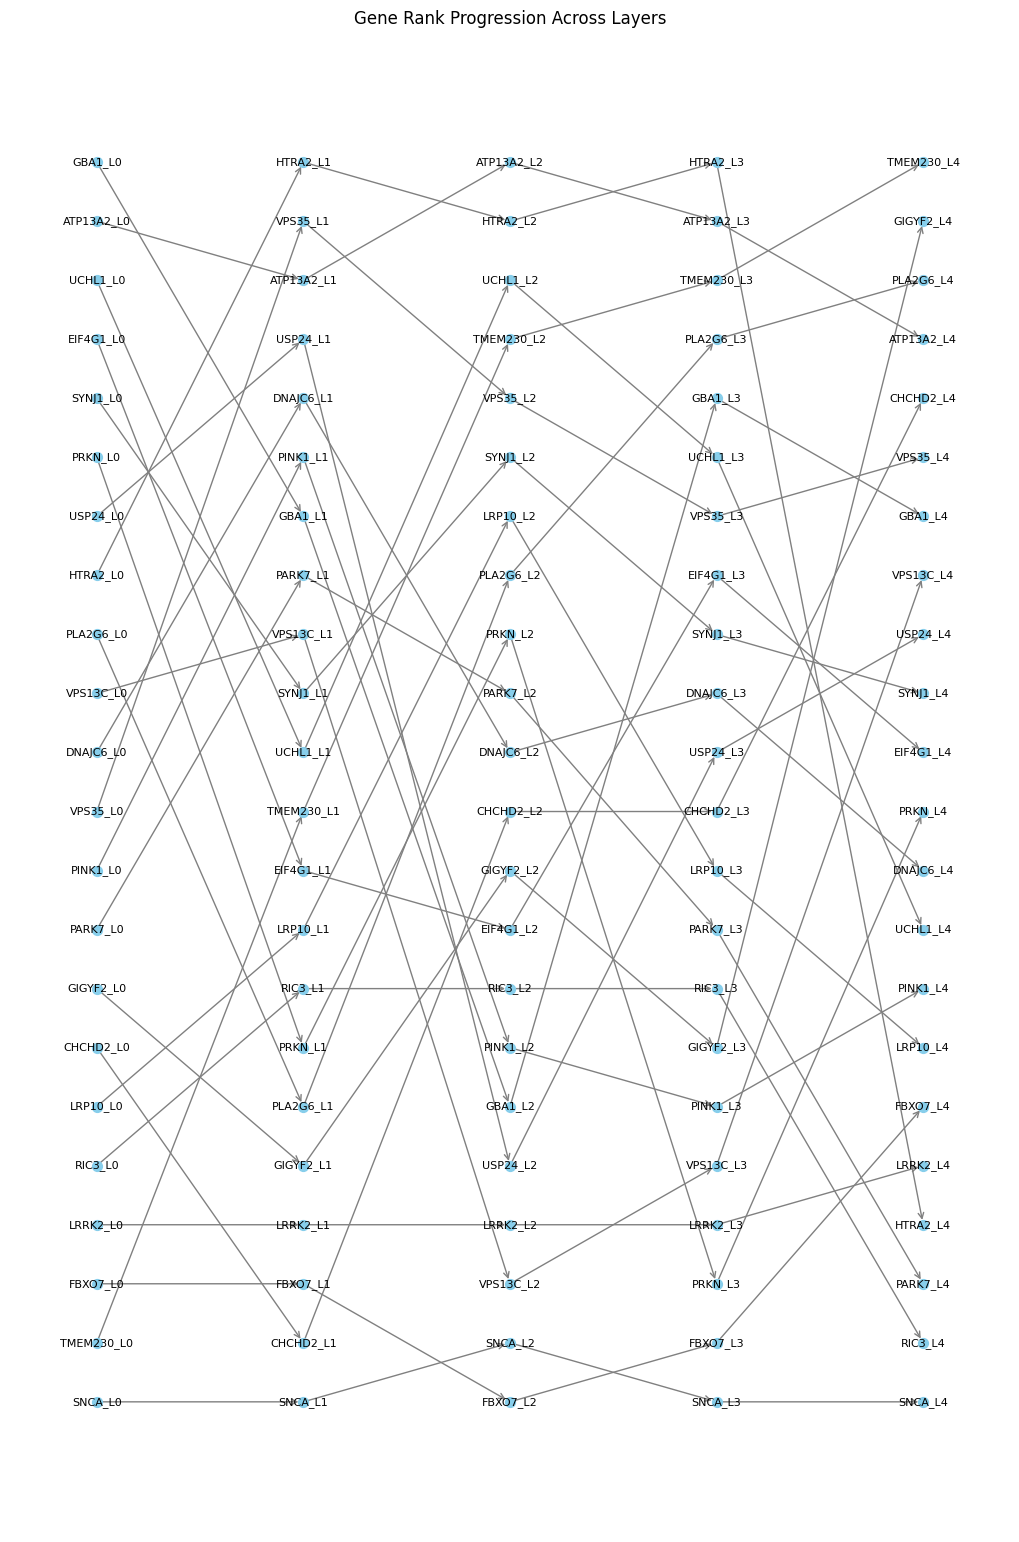

In [160]:
import matplotlib.pyplot as plt
import networkx as nx

# The rank positions for each gene across four layers
gene_ranks = rank_dict

G = nx.DiGraph()

# Number of layers
num_layers = len(next(iter(gene_ranks.values())))

# Add nodes and edges for each gene across the layers
for gene, ranks in gene_ranks.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

plt.title("Gene Rank Progression Across Layers")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.show()

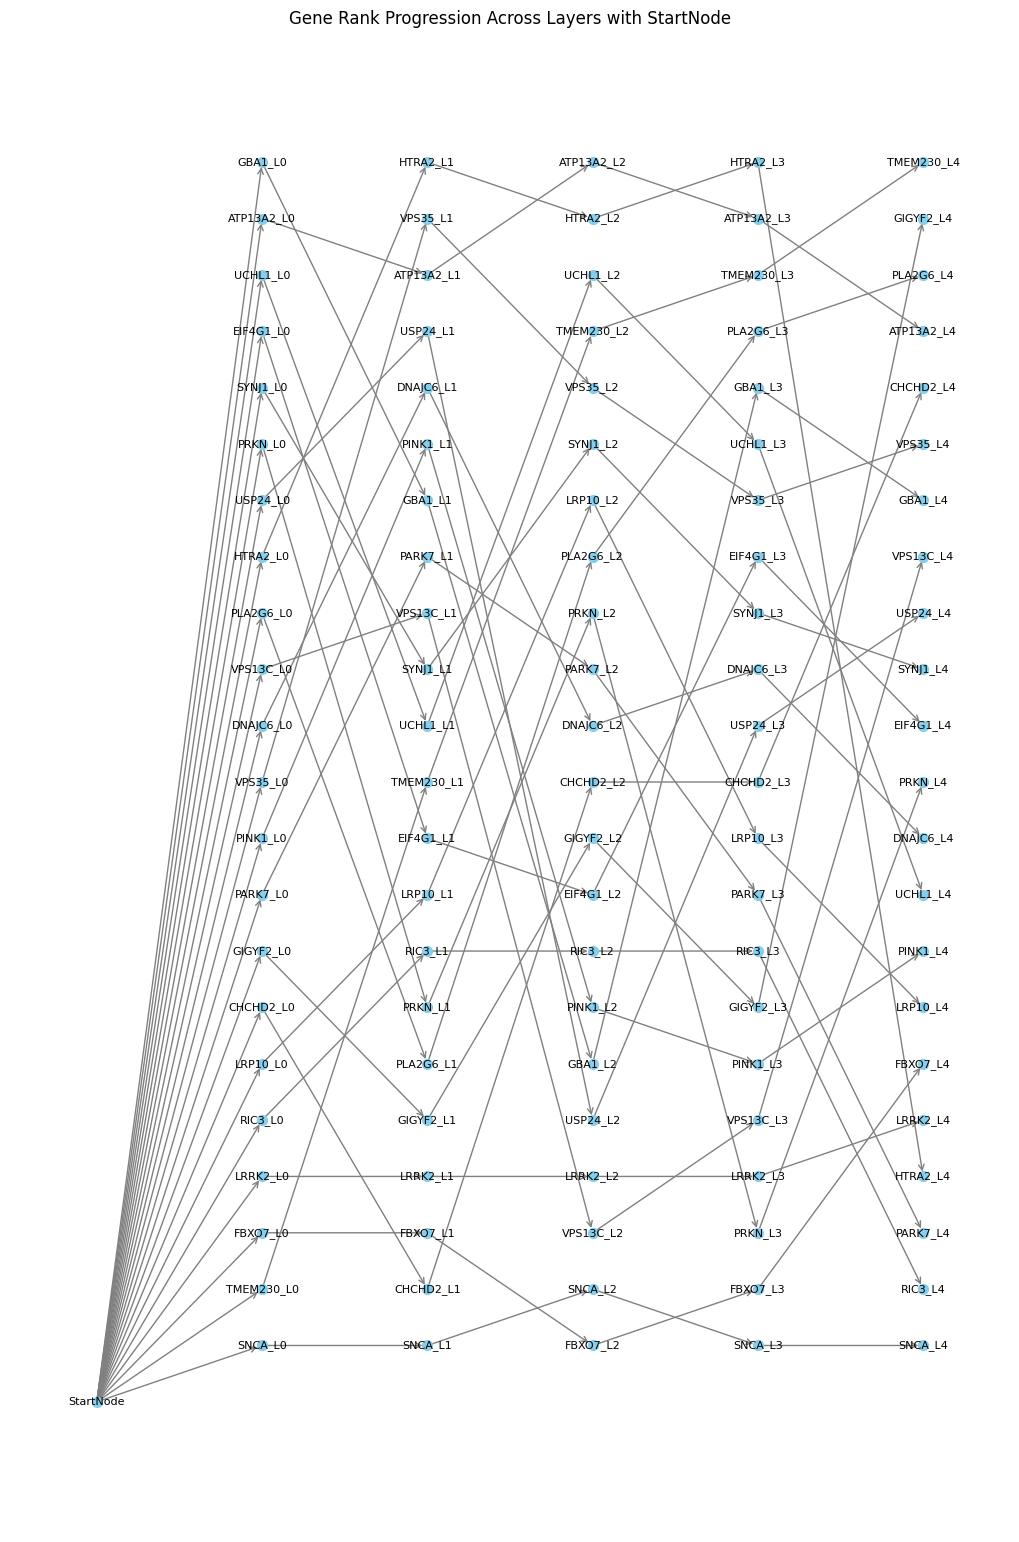

In [161]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)

# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.savefig("gene_rank_progression.svg", format="svg")
plt.savefig("smaller_plots/smaller_gene_ranked_prgression_control_to_prodromal.png", dpi=100)

plt.show()


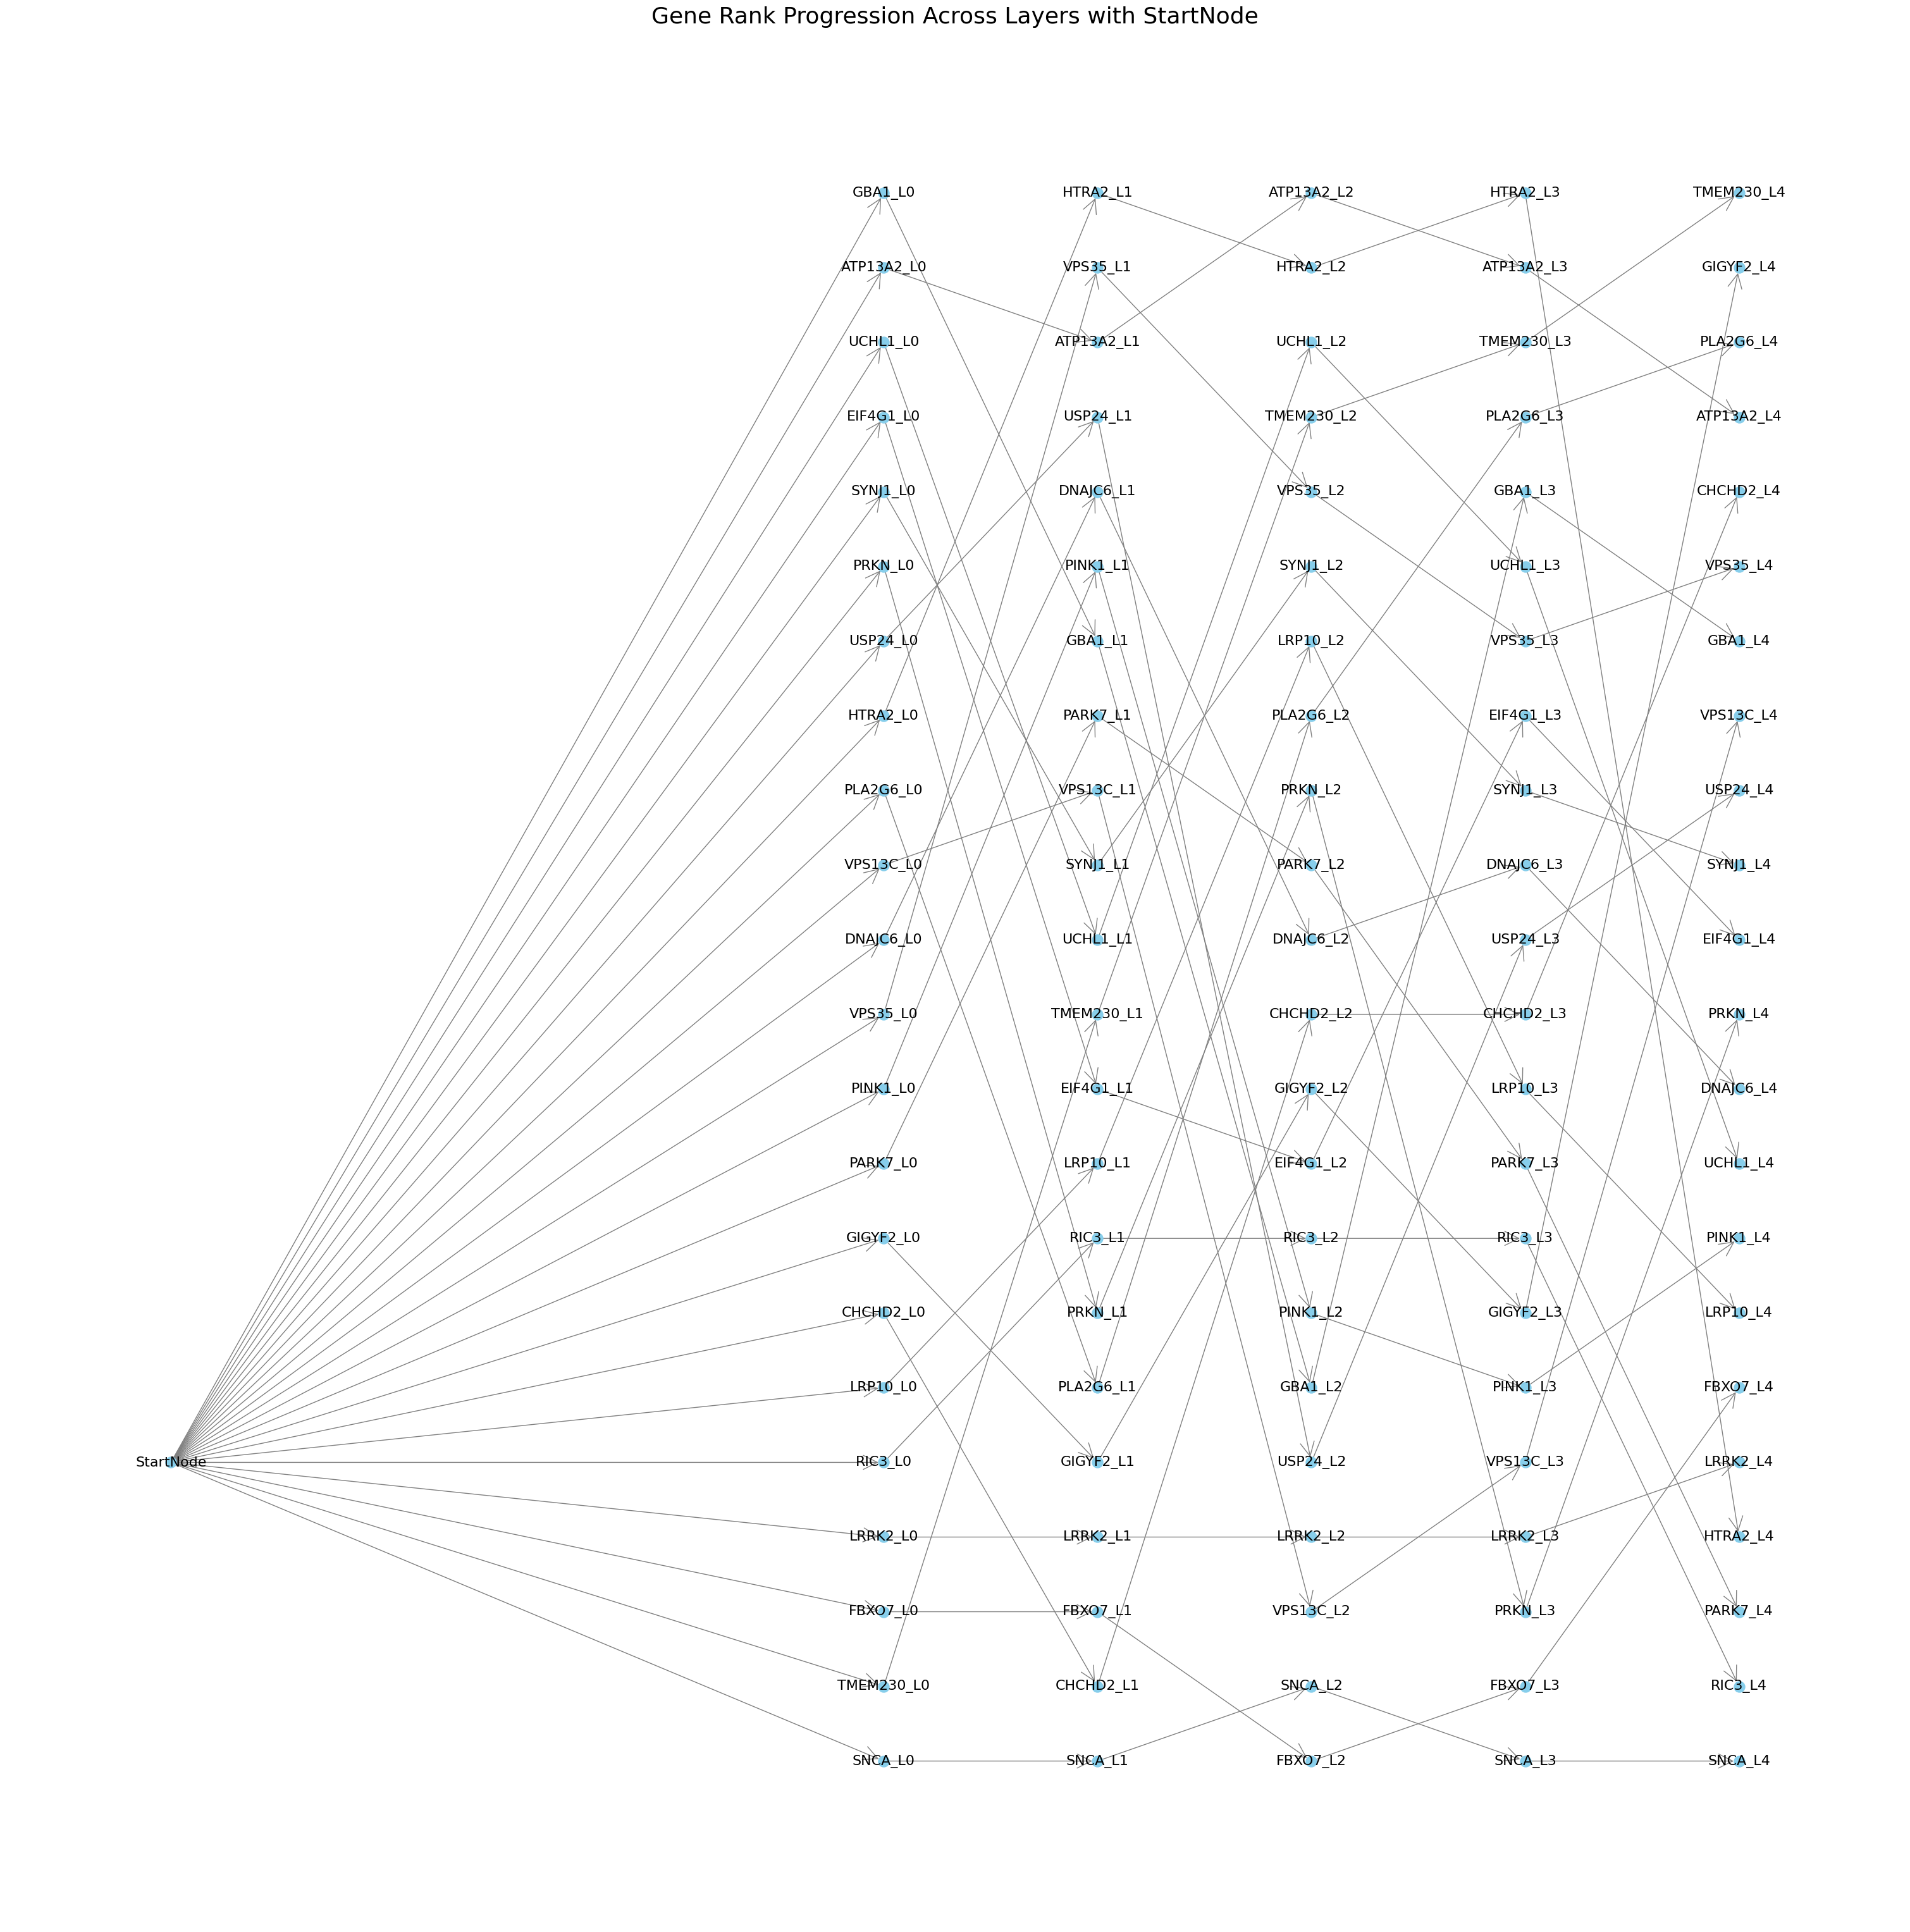

In [162]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)



# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

# Set the position of the StartNode to be at the mid-left of the first layer
start_node_x_pos = -5 # Fixed position on the left
start_node_y_pos = -1.5  # Middle of first layer vertically

# Position the nodes
for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    
    if layer == -1:
        # Place the StartNode on the mid-left of the first layer
        pos[node] = (start_node_x_pos, start_node_y_pos)
    else:
        # Place other nodes based on their layer and rank
        pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(30, 30))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=16, arrowstyle='->', arrowsize=40, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode", fontsize=26)
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower

# Save the plot as an SVG file
plt.savefig("gene_rank_progression_with_start_node_left.svg", format="svg")
plt.savefig("gene_rank_progression_with_start_node_left.png", format="png")
# Show the plot
plt.show()


In [164]:
!mkdir -p feature_importance_weights/PD_genes/control_vs_prodromal

def return_value(i):

    l = [AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i],AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i],
         AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i],
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i],AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i]]
    return l


li = []
genes = []
for i in AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys():
    
    li.append(return_value(i))
    genes.append(i)

df = pd.DataFrame(li)
df['genes'] = genes
df = df.set_index('genes')
df.columns = ['BL','V02','V04','V06','V08']
df['Gene_Name'] =df.reset_index()['genes'].apply(return_gene_name).tolist()
df = df.set_index('Gene_Name')
df.to_csv(f'feature_importance_weights/PD_genes/control_vs_prodromal/control_vs_prodromal.csv',index = True)
df


BL       V02       V04       V06       V08
Gene_Name                                                  
SNCA       0.000330  0.002057  0.002250  0.004266  0.000445
EIF4G1     0.338377  0.049089  0.088917 -0.311108 -0.157215
USP24     -0.162275 -0.201946  0.044283  0.159376  0.200072
NaN       -0.730624 -0.119837 -0.047404 -0.603057 -0.236229
FBXO7     -0.011316 -0.010272  0.001827 -0.004700 -0.088701
VPS13C     0.085019  0.100421 -0.014269 -0.064359  0.200086
SYNJ1      0.253069  0.090263  0.357365  0.272204  0.163866
PARK7     -0.049664 -0.102714 -0.183165 -0.088303  0.032316
LRRK2     -0.016254 -0.015399 -0.019961 -0.029527 -0.084904
PLA2G6    -0.126567 -0.020335  0.265360  0.622530  0.387335
VPS35      0.071777  0.319340  0.493739  0.476560  0.247129
GIGYF2    -0.049389  0.015825 -0.105311 -0.068999 -0.425212
PRKN       0.163268 -0.025939  0.254319  0.013495 -0.142894
DNAJC6    -0.075943 -0.155789  0.173602 -0.226137 -0.139473
LRP10     -0.020965  0.040140 -0.289168 -0.098825 -0.090370
PINK1      0.057864  0.140970 -0.063402  0.067109  0.108419
RIC3      -0.020105  0.029481  0.081710  0.081441  0.001328
TMEM230    0.003314 -0.058788 -0.650424 -0.727026 -0.547060
HTRA2     -0.143690 -0.388595 -0.709475 -1.425822 -0.071716
CHCHD2     0.023463 -0.010179  0.165831  0.152610  0.279212
ATP13A2    0.430522  0.212989  1.014851  1.216432  0.283613
UCHL1     -0.359068 -0.069485  0.666497  0.522243  0.118091